# The Planet Fitness Underperforming Franchise
Diving into possible reasons why the second Roswell gym is underperforming compared to surrounding gyms. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from geopy.geocoders import Nominatim  # Geocoding library
from geopy.distance import geodesic  # Distance calculation
import numpy as np  # For statistical operations
from sklearn.neighbors import KernelDensity
import geopandas as gpd
from shapely.geometry import Polygon
import os
import seaborn as sns


# Read the data files
milton_df = pd.read_csv("data/raw/milton.csv")
woodstock_df = pd.read_csv("data/raw/woodstock.csv")
roswell_problem_df = pd.read_csv("data/raw/roswell_problem.csv")
roswell_df = pd.read_csv("data/raw/roswell.csv")

print('Libraries and Data Loaded')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Libraries and Data Loaded


## Activation: Gym Visitation

When do people go to the gyms and for how long are they there?

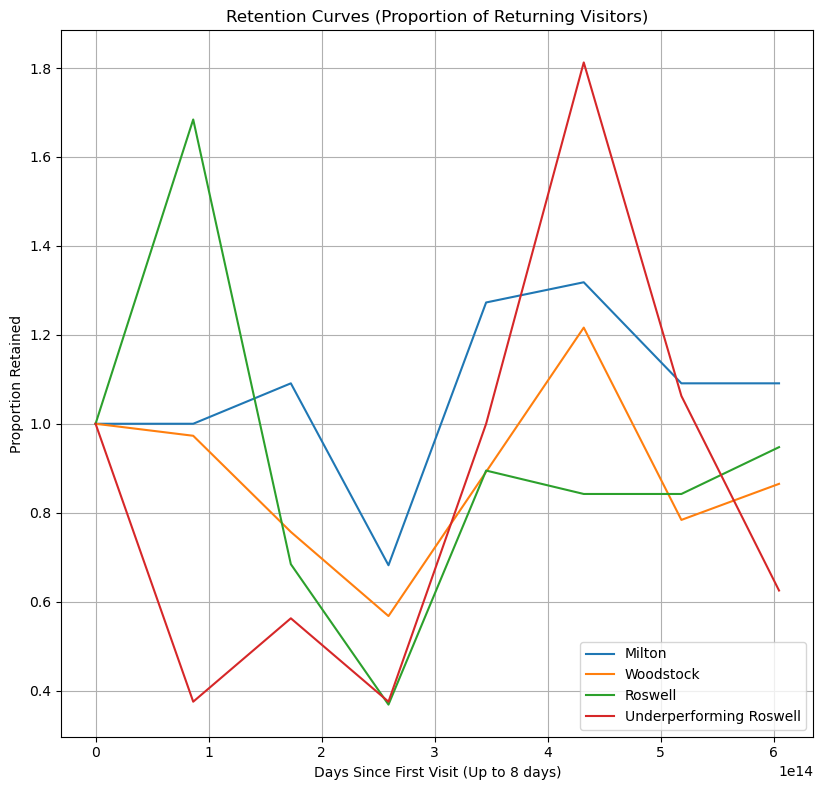

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


def calculate_retention_curve(df, gym_name, num_days=8):
    """
    Calculates and plots the retention curve for a gym.

    Args:
        df (pandas.DataFrame): Gym visitation data.
        gym_name (str): Name of the gym.
        num_days (int): Number of days to consider for the retention curve (default is 8).
    """

    # Convert 'visit_start_time' to datetime format
    df['visit_start_time'] = pd.to_datetime(df['visit_start_time'])

    # Define a base date (e.g., first day of data collection)
    base_date = df['visit_start_time'].min().date()

    # Calculate the difference between visit date and base date in days
    df['days_since_first_visit'] = (df['visit_start_time'].dt.date - base_date)

    # Group data by days_since_first_visit and count unique device IDs (unique visitors)
    visitor_counts = df.groupby('days_since_first_visit')['device_id'].nunique()

    # Normalize visitor counts by the total number of visitors on the first day (day 0)
    retention_rate = visitor_counts / visitor_counts.iloc[0]

    # Plot retention curve
    plt.plot(retention_rate.index[:num_days], retention_rate.values[:num_days], label=gym_name)


def plot_retention_curves(num_days=8):
    """
    Plots the retention curves for all gyms.

    Args:
        num_days (int): Number of days to consider for the retention curve (default is 8).
    """

    # Create a larger and wider figure (adjust as needed)
    plt.figure(figsize=(16, 8))

    # Plot retention curves for each gym
    plt.subplot(121)  # Create subplot for retention curves
    calculate_retention_curve(milton_df.copy(), 'Milton', num_days)
    calculate_retention_curve(woodstock_df.copy(), 'Woodstock', num_days)
    calculate_retention_curve(roswell_df.copy(), 'Roswell', num_days)
    calculate_retention_curve(roswell_problem_df.copy(), 'Underperforming Roswell', num_days)

    # Customize the plot for retention curves
    plt.title('Retention Curves (Proportion of Returning Visitors)')
    plt.xlabel(f'Days Since First Visit (Up to {num_days} days)')
    plt.ylabel('Proportion Retained')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Improve spacing between elements
    plt.show()


# Read the data files
milton_df = pd.read_csv("data/raw/milton.csv")
woodstock_df = pd.read_csv("data/raw/woodstock.csv")
roswell_problem_df = pd.read_csv("data/raw/roswell_problem.csv")
roswell_df = pd.read_csv("data/raw/roswell.csv")

# Call the function to plot retention curves
plot_retention_curves(num_days=8)


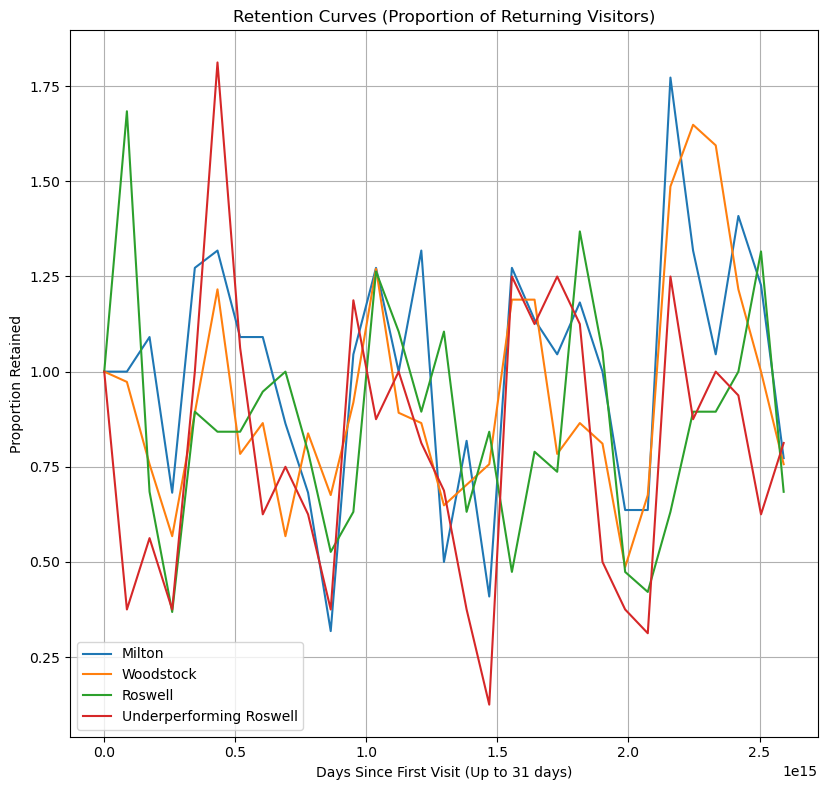

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


def calculate_retention_curve(df, gym_name, num_days=31):
    """
    Calculates and plots the retention curve for a gym.

    Args:
        df (pandas.DataFrame): Gym visitation data.
        gym_name (str): Name of the gym.
        num_days (int): Number of days to consider for the retention curve (default is 31).
    """

    # Convert 'visit_start_time' to datetime format
    df['visit_start_time'] = pd.to_datetime(df['visit_start_time'])

    # Define a base date (e.g., first day of data collection)
    base_date = df['visit_start_time'].min().date()

    # Calculate the difference between visit date and base date in days
    df['days_since_first_visit'] = (df['visit_start_time'].dt.date - base_date)

    # Group data by days_since_first_visit and count unique device IDs (unique visitors)
    visitor_counts = df.groupby('days_since_first_visit')['device_id'].nunique()

    # Normalize visitor counts by the total number of visitors on the first day (day 0)
    retention_rate = visitor_counts / visitor_counts.iloc[0]

    # Plot retention curve
    plt.plot(retention_rate.index[:num_days], retention_rate.values[:num_days], label=gym_name)


def plot_retention_curves(num_days=31):
    """
    Plots the retention curves for all gyms.

    Args:
        num_days (int): Number of days to consider for the retention curve (default is 31).
    """

    # Create a larger and wider figure (adjust as needed)
    plt.figure(figsize=(16, 8))

    # Plot retention curves for each gym
    plt.subplot(121)  # Create subplot for retention curves
    calculate_retention_curve(milton_df.copy(), 'Milton', num_days)
    calculate_retention_curve(woodstock_df.copy(), 'Woodstock', num_days)
    calculate_retention_curve(roswell_df.copy(), 'Roswell', num_days)
    calculate_retention_curve(roswell_problem_df.copy(), 'Underperforming Roswell', num_days)

    # Customize the plot for retention curves
    plt.title('Retention Curves (Proportion of Returning Visitors)')
    plt.xlabel(f'Days Since First Visit (Up to {num_days} days)')
    plt.ylabel('Proportion Retained')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Improve spacing between elements
    plt.show()


# Read the data files
milton_df = pd.read_csv("data/raw/milton.csv")
woodstock_df = pd.read_csv("data/raw/woodstock.csv")
roswell_problem_df = pd.read_csv("data/raw/roswell_problem.csv")
roswell_df = pd.read_csv("data/raw/roswell.csv")

# Call the function to plot retention curves up to 31 days
plot_retention_curves(num_days=31)


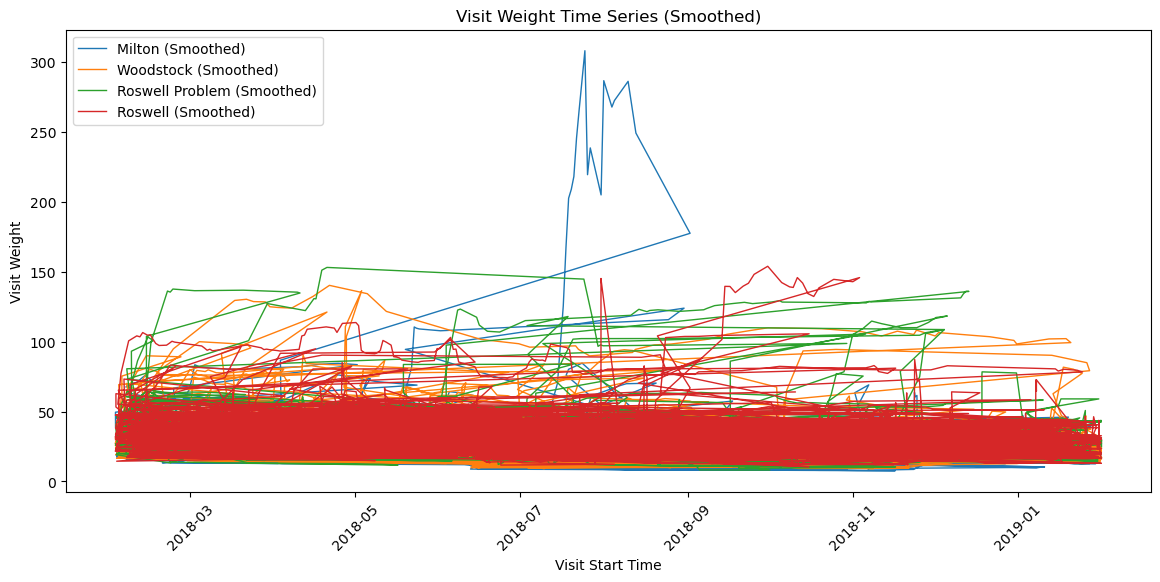

In [4]:
# Extract relevant columns
milton_data = milton_df[["visit_start_time", "visit_weight"]]
woodstock_data = woodstock_df[["visit_start_time", "visit_weight"]]
roswell_problem_data = roswell_problem_df[["visit_start_time", "visit_weight"]]
roswell_data = roswell_df[["visit_start_time", "visit_weight"]]

# Convert visit_start_time to datetime using .apply
def convert_to_datetime(df, col_name):
  df[col_name] = pd.to_datetime(df[col_name])
  return df

milton_data = convert_to_datetime(milton_data.copy(), "visit_start_time")
woodstock_data = convert_to_datetime(woodstock_data.copy(), "visit_start_time")
roswell_problem_data = convert_to_datetime(roswell_problem_data.copy(), "visit_start_time")
roswell_data = convert_to_datetime(roswell_data.copy(), "visit_start_time")

# Define window size for moving average
window_size = 3

def moving_average(data):
  smoothed_data = data.rolling(window=window_size).mean()
  return smoothed_data

# Apply moving average to visit weight for each dataset
milton_data["visit_weight_smoothed"] = moving_average(milton_data["visit_weight"])
woodstock_data["visit_weight_smoothed"] = moving_average(woodstock_data["visit_weight"])
roswell_problem_data["visit_weight_smoothed"] = moving_average(roswell_problem_data["visit_weight"])
roswell_data["visit_weight_smoothed"] = moving_average(roswell_data["visit_weight"])

# Plot time series with wider figure, narrower lines, and smoothed data
plt.figure(figsize=(14, 6))  # Wider figure
plt.plot(milton_data["visit_start_time"], milton_data["visit_weight_smoothed"], label="Milton (Smoothed)", linewidth=1)
plt.plot(woodstock_data["visit_start_time"], woodstock_data["visit_weight_smoothed"], label="Woodstock (Smoothed)", linewidth=1)
plt.plot(roswell_problem_data["visit_start_time"], roswell_problem_data["visit_weight_smoothed"], label="Roswell Problem (Smoothed)", linewidth=1)
plt.plot(roswell_data["visit_start_time"], roswell_data["visit_weight_smoothed"], label="Roswell (Smoothed)", linewidth=1)

# Add labels and title
plt.xlabel("Visit Start Time")
plt.ylabel("Visit Weight")
plt.title("Visit Weight Time Series (Smoothed)")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.grid(False)        # Turn off grid lines
plt.legend(loc='upper left')  # Move legend to upper left

# Show plot
plt.show()

In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt

# def calculate_retention_cohort(df, gym_name):
#   """
#   Calculates and plots the retention cohort for a gym.

#   Args:
#       df (pandas.DataFrame): Gym visitation data.
#       gym_name (str): Name of the gym.
#   """

#   # Convert 'visit_start_time' to datetime format
#   df['visit_start_time'] = pd.to_datetime(df['visit_start_time'])

#   # Define a base period (e.g., month)
#   base_period = pd.Grouper(level='visit_start_time', freq='ME')

#   # Calculate cohort month
#   df['cohort_month'] = base_period
#   cohort_counts = df.groupby(['cohort_month', 'device_id'])['visit_start_time'].count().unstack(fill_value=0)

#   # Calculate retention rate (proportion of returning visitors within the cohort)
#   retention_rate = cohort_counts.div(cohort_counts.iloc[0], axis=0)

#   # Plot retention cohort heatmap using matplotlib.pyplot.heatmap
#   plt.figure(figsize=(12, 6))
#   plt.imshow(retention_rate, cmap='plasma')  # Use imshow for heatmap
#   plt.colorbar(label='Proportion Retained')
#   plt.title(f'Retention Cohort for {gym_name}')
#   plt.xlabel('Months Since Joining')
#   plt.ylabel('Cohort Month')
#   plt.xticks(rotation=0)
#   plt.grid(False)
#   plt.show()


# def plot_retention_cohorts():
#   """
#   Plots the retention cohorts for all gyms.
#   """

#   # Calculate and plot retention cohort for each gym
#   calculate_retention_cohort(milton_df.copy(), 'Milton')
#   calculate_retention_cohort(woodstock_df.copy(), 'Woodstock')
#   calculate_retention_cohort(roswell_df.copy(), 'Roswell')
#   calculate_retention_cohort(roswell_problem_df.copy(), 'Underperforming Roswell')


# plot_retention_cohorts()


Well that is super messy. We are going to have to resample the data for each day to get a better understanding of what the trends look like for visitation. 

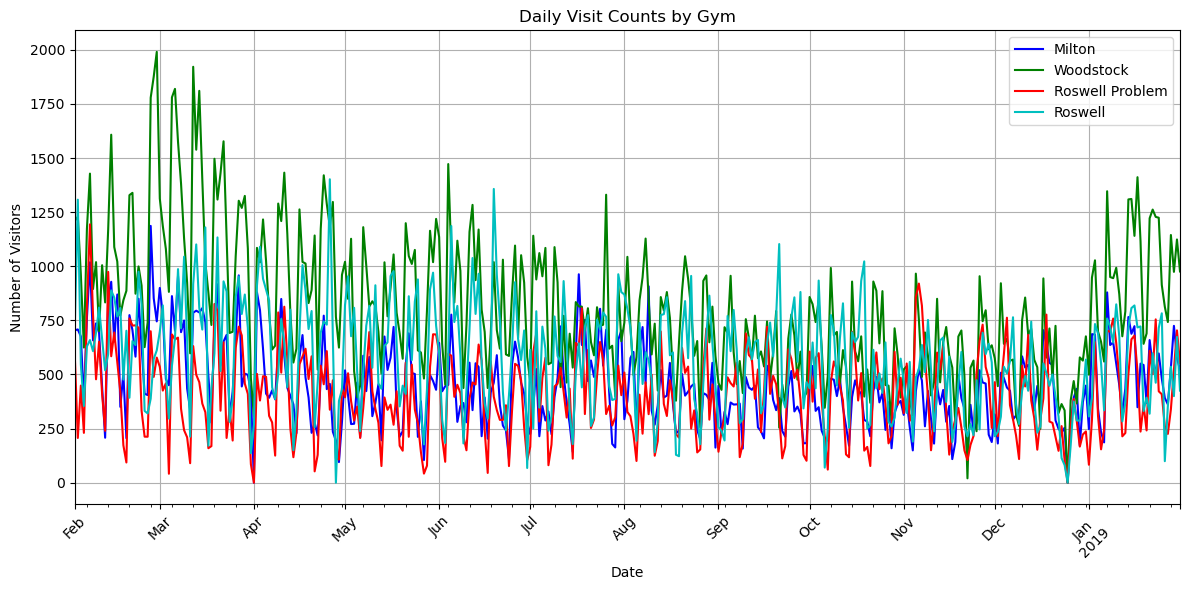

In [6]:
# Resample data to daily intervals and sum visit weight for each day
def daily_visit_counts(df):
  df["visit_start_time"] = pd.to_datetime(df["visit_start_time"])
  daily_counts = df.resample("D", on="visit_start_time")["visit_weight"].sum()
  return daily_counts

milton_counts = daily_visit_counts(milton_df.copy())
woodstock_counts = daily_visit_counts(woodstock_df.copy())
roswell_problem_counts = daily_visit_counts(roswell_problem_df.copy())
roswell_counts = daily_visit_counts(roswell_df.copy())

# Plot daily visit counts for each gym
plt.figure(figsize=(12, 6))
milton_counts.plot(label="Milton", style='b-')
woodstock_counts.plot(label="Woodstock", style='g-')
roswell_problem_counts.plot(label="Roswell Problem", style='r-')
roswell_counts.plot(label="Roswell", style='c-')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.title("Daily Visit Counts by Gym")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

It's still difficult to understand the daily trends. But this overall chart does show that Woodstock is much more frequently visited than Roswell gyms. 

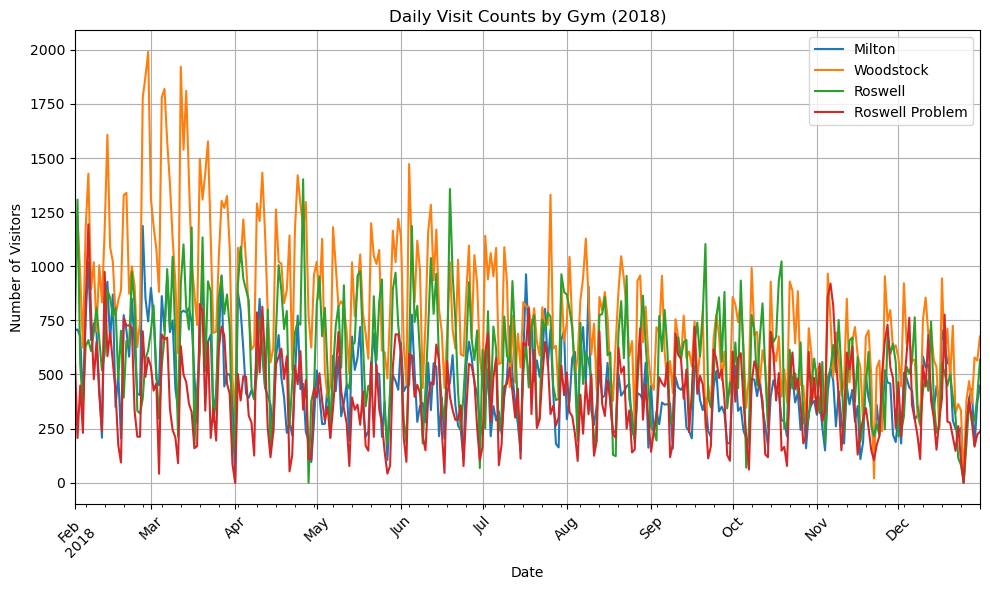

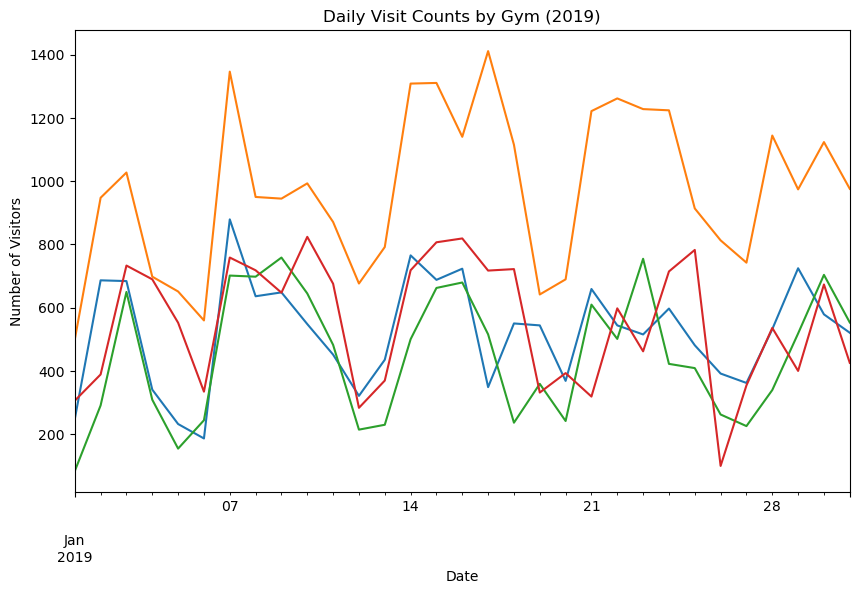

In [7]:
# Resample data to daily intervals and sum visit weight for each day
def daily_visit_counts(df):
  df["visit_start_time"] = pd.to_datetime(df["visit_start_time"])
  daily_counts = df.resample("D", on="visit_start_time")["visit_weight"].sum()
  return daily_counts

milton_counts = daily_visit_counts(milton_df.copy())
woodstock_counts = daily_visit_counts(woodstock_df.copy())
roswell_problem_counts = daily_visit_counts(roswell_problem_df.copy())
roswell_counts = daily_visit_counts(roswell_df.copy())

# # Define softer colormap
# cmap = colors.LinearSegmentedColormap.from_list("", ["skyblue", "lightgreen", "black", "coral"])

# Filter data for 2018 and 2019
def filter_by_year(data, year):
  return data[data.index.year == year]

# Create charts for 2018 and 2019

# Chart 1: 2018 Data
plt.figure(figsize=(10, 6))
milton_2018 = filter_by_year(milton_counts.copy(), 2018)
woodstock_2018 = filter_by_year(woodstock_counts.copy(), 2018)
roswell_problem_2018 = filter_by_year(roswell_problem_counts.copy(), 2018)
roswell_2018 = filter_by_year(roswell_counts.copy(), 2018)

milton_2018.plot(label="Milton")
woodstock_2018.plot(label="Woodstock")
roswell_2018.plot(label="Roswell")
roswell_problem_2018.plot(label="Roswell Problem")

plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.title("Daily Visit Counts by Gym (2018)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Chart 2: 2019 Data (optional)
plt.figure(figsize=(10, 6))
milton_2019 = filter_by_year(milton_counts.copy(), 2019)
woodstock_2019 = filter_by_year(woodstock_counts.copy(), 2019)
roswell_2019 = filter_by_year(roswell_counts.copy(), 2019)
roswell_problem_2019 = filter_by_year(roswell_problem_counts.copy(), 2019)

milton_2019.plot(label="Milton")
woodstock_2019.plot(label="Woodstock")
roswell_problem_2019.plot(label="Roswell Problem")
roswell_2019.plot(label="Roswell")

plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.title("Daily Visit Counts by Gym (2019)")
plt.show()


There is certainly weekly trends as the visitation drops during the weekends. And pick back up again on Monday through Thursday. (January 1 2019 starts on a Tuesday)

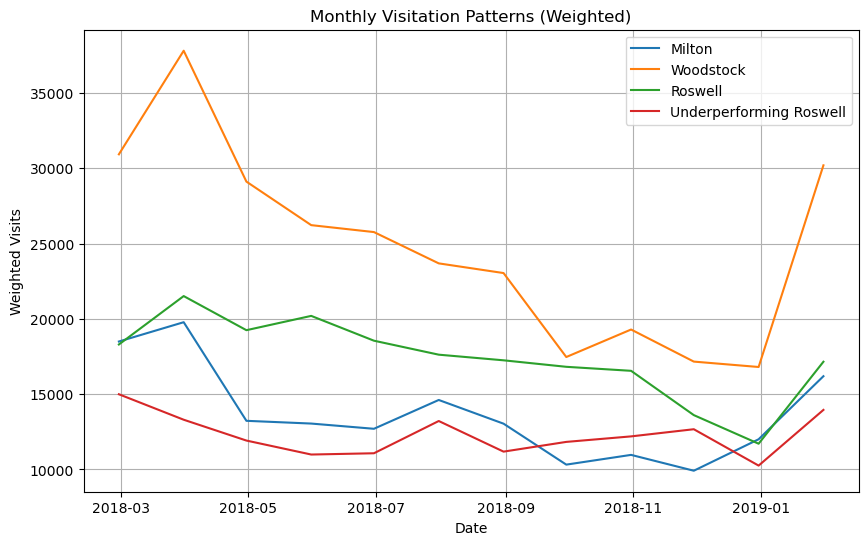

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read gym visitation data
milton_df = pd.read_csv("data/raw/milton.csv")
woodstock_df = pd.read_csv("data/raw/woodstock.csv")
roswell_df = pd.read_csv("data/raw/roswell.csv")
roswell_problem_df = pd.read_csv("data/raw/roswell_problem.csv")

# Define function to plot trendlines for each gym
def plot_trendline(df, gym_name):
    # Convert 'visit_start_time' to datetime format
    df['visit_start_time'] = pd.to_datetime(df['visit_start_time'])
    
    # Set 'visit_start_time' as index
    df.set_index('visit_start_time', inplace=True)
    
    # Resample data to monthly interval and sum the visit weights for each month
    monthly_weighted_visits = df.resample('ME').sum()
    
    # Plot trendline
    plt.plot(monthly_weighted_visits.index, monthly_weighted_visits['visit_weight'], label=gym_name)

# Plot trendlines for each gym
plt.figure(figsize=(10, 6))

plot_trendline(milton_df, 'Milton')
plot_trendline(woodstock_df, 'Woodstock')
plot_trendline(roswell_df, 'Roswell')
plot_trendline(roswell_problem_df, 'Underperforming Roswell')

plt.title('Monthly Visitation Patterns (Weighted)')
plt.xlabel('Date')
plt.ylabel('Weighted Visits')
plt.legend()
plt.grid(True)
plt.show()


When are they frequenting the gym?

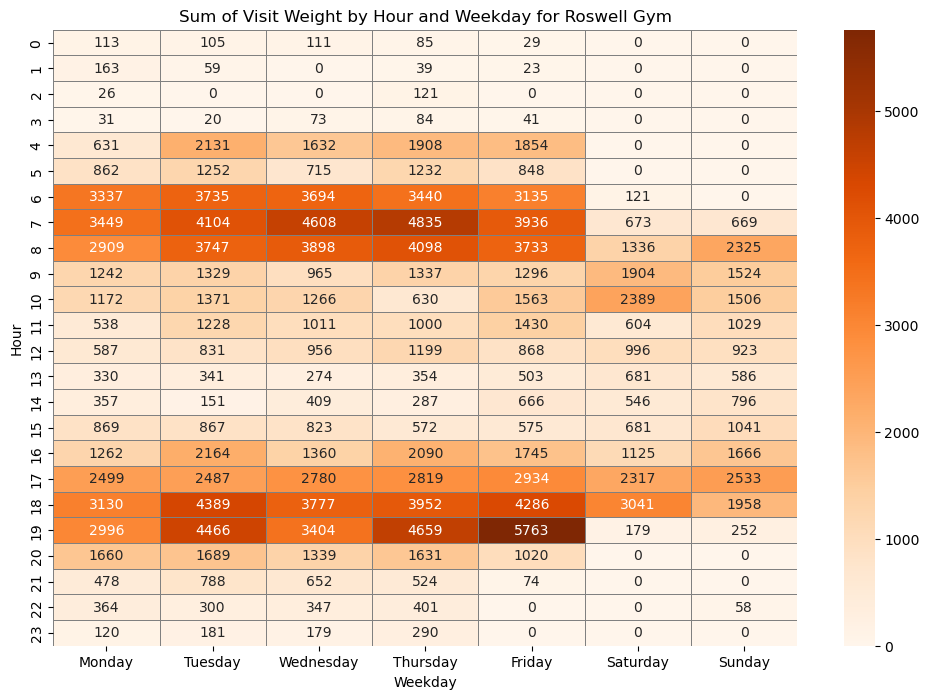

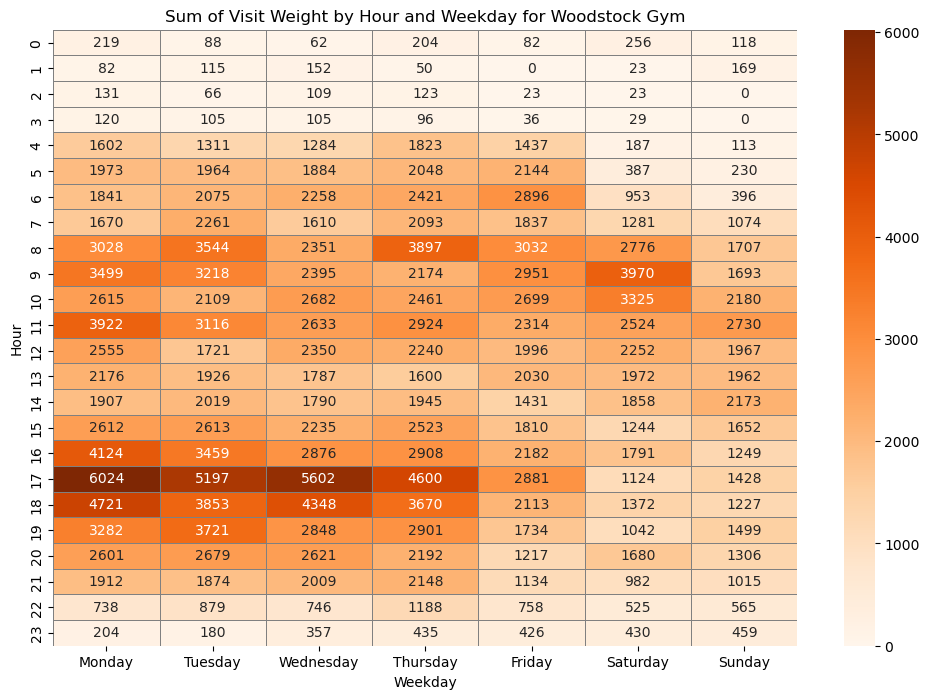

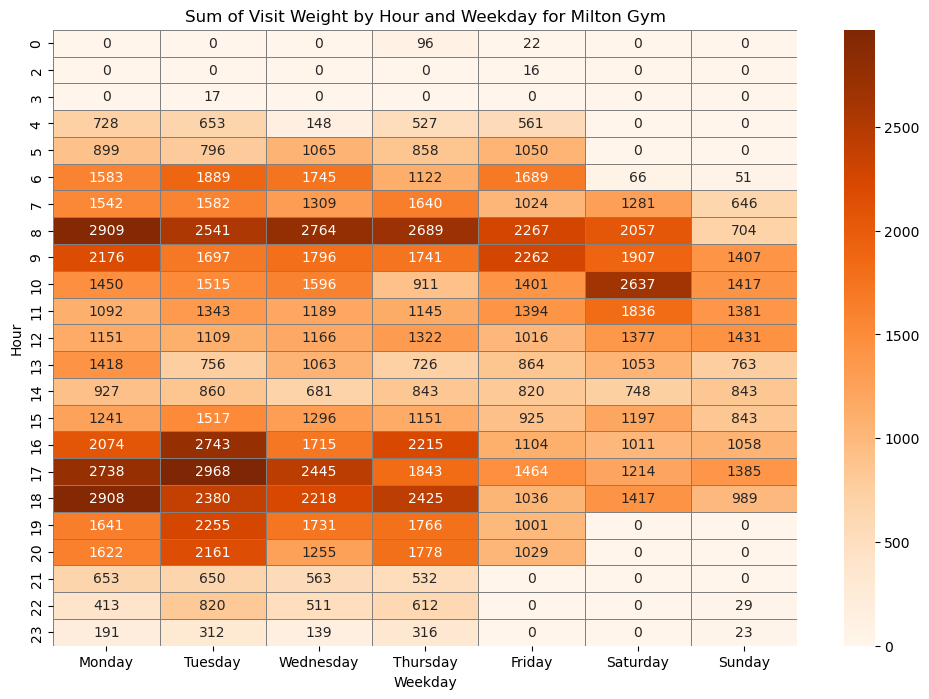

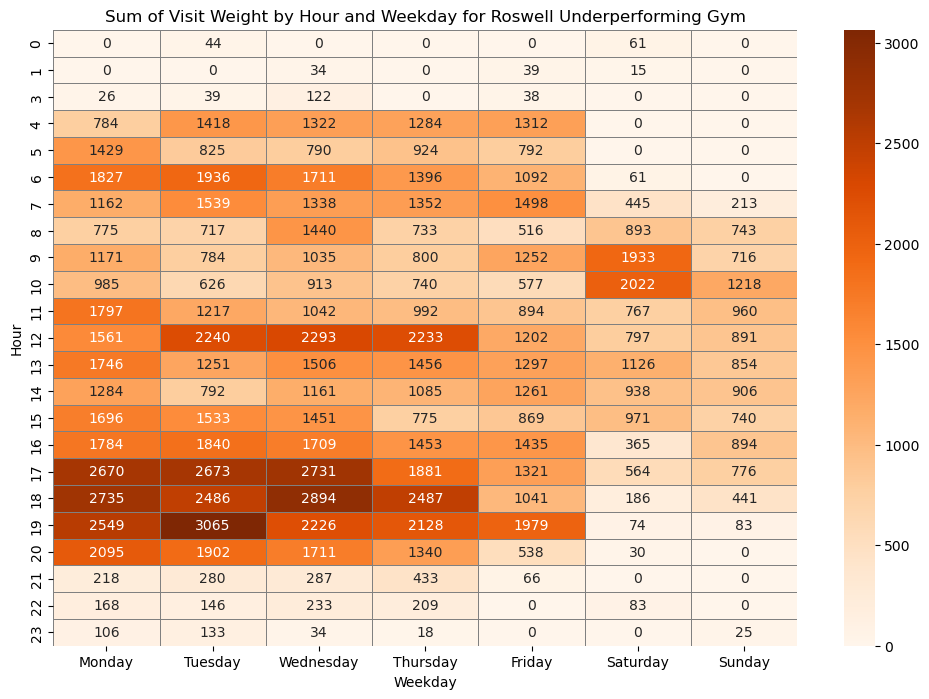

In [9]:
# Define gym filenames and gym names
gym_filenames = ["data/raw/roswell.csv", "data/raw/woodstock.csv", "data/raw/milton.csv", "data/raw/roswell_problem.csv"]
gym_names = ["Roswell", "Woodstock", "Milton", "Roswell Underperforming"]

# Function to process gym data and create heatmap plot
def create_heatmap(filename, gym_name):
    # Load data
    df = pd.read_csv(filename)

    # Convert visit_start_time to datetime
    df["visit_start_time"] = pd.to_datetime(df["visit_start_time"])

    # Extract weekday and hour from visit_start_time
    df["weekday"] = df["visit_start_time"].dt.day_name()
    df["hour"] = df["visit_start_time"].dt.hour

    # Group by weekday and hour, then sum the visit_weight
    highlight_table = df.groupby(["weekday", "hour"])["visit_weight"].sum().unstack().fillna(0)

    # Reorder weekdays for better visualization
    weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    highlight_table = highlight_table.reindex(weekdays_order)

    # Transpose the highlight_table to switch axes
    highlight_table = highlight_table.T

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.heatmap(highlight_table, cmap="Oranges", annot=True, fmt=".0f", linewidths=0.5, linecolor='grey')

    plt.title(f"Sum of Visit Weight by Hour and Weekday for {gym_name} Gym")
    plt.xlabel("Weekday")
    plt.ylabel("Hour")

    plt.show()

# Create heatmap plot for each gym
for filename, gym_name in zip(gym_filenames, gym_names):
    create_heatmap(filename, gym_name)


<Figure size 1000x600 with 0 Axes>

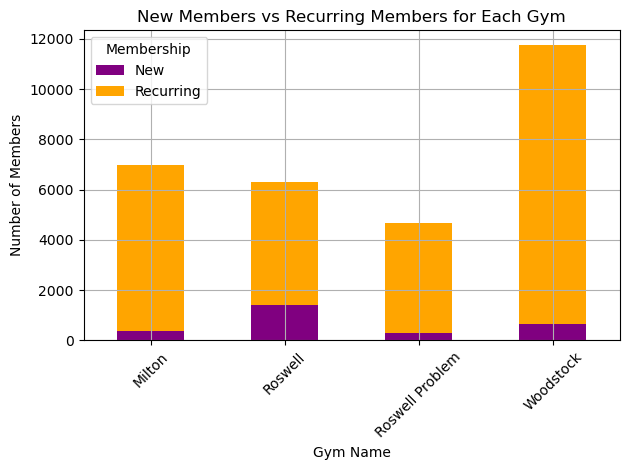

In [10]:
# Add gym name column to each DataFrame
milton_df['gym_name'] = 'Milton'
woodstock_df['gym_name'] = 'Woodstock'
roswell_problem_df['gym_name'] = 'Roswell Problem'
roswell_df['gym_name'] = 'Roswell'

# Concatenate data for all gyms
all_data = pd.concat([milton_df, woodstock_df, roswell_problem_df, roswell_df], ignore_index=True)

# Function to determine if a device ID is new or recurring
def determine_membership(df):
    # Count occurrences of each device ID
    device_counts = df['device_id'].value_counts()
    
    # Create a column to classify members as new or recurring
    df['membership'] = 'New'
    df.loc[df['device_id'].isin(device_counts.index[device_counts > 1]), 'membership'] = 'Recurring'
    
    return df

# Determine membership (new or recurring)
all_data = determine_membership(all_data)

# Calculate counts of new and recurring members for each gym
membership_counts = all_data.groupby(['gym_name', 'membership']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
membership_counts.plot(kind='bar', stacked=True, color=['purple', 'orange'])
plt.xlabel('Gym Name')
plt.ylabel('Number of Members')
plt.title('New Members vs Recurring Members for Each Gym')
plt.legend(title='Membership')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


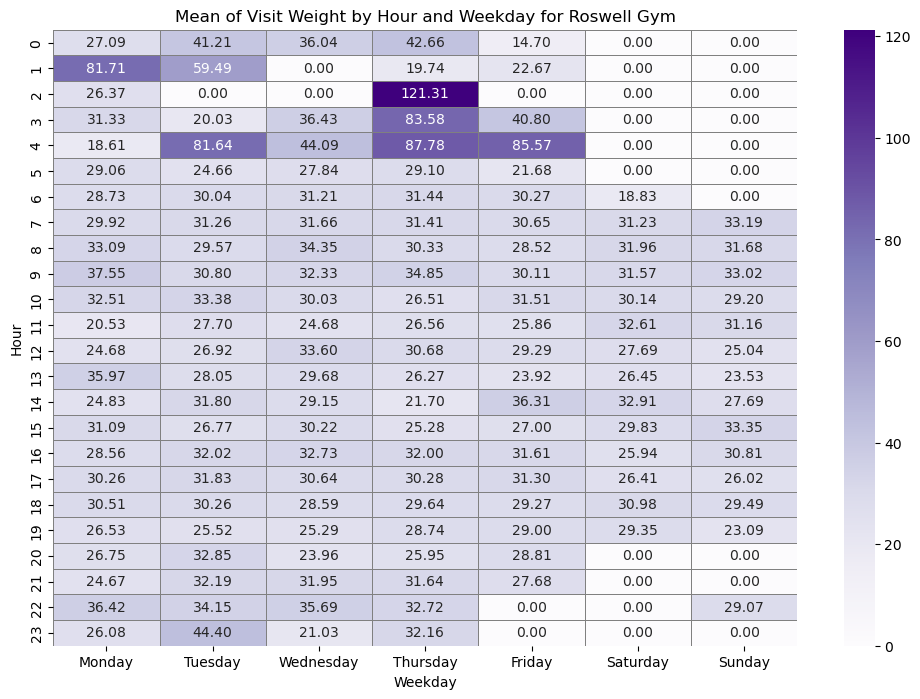

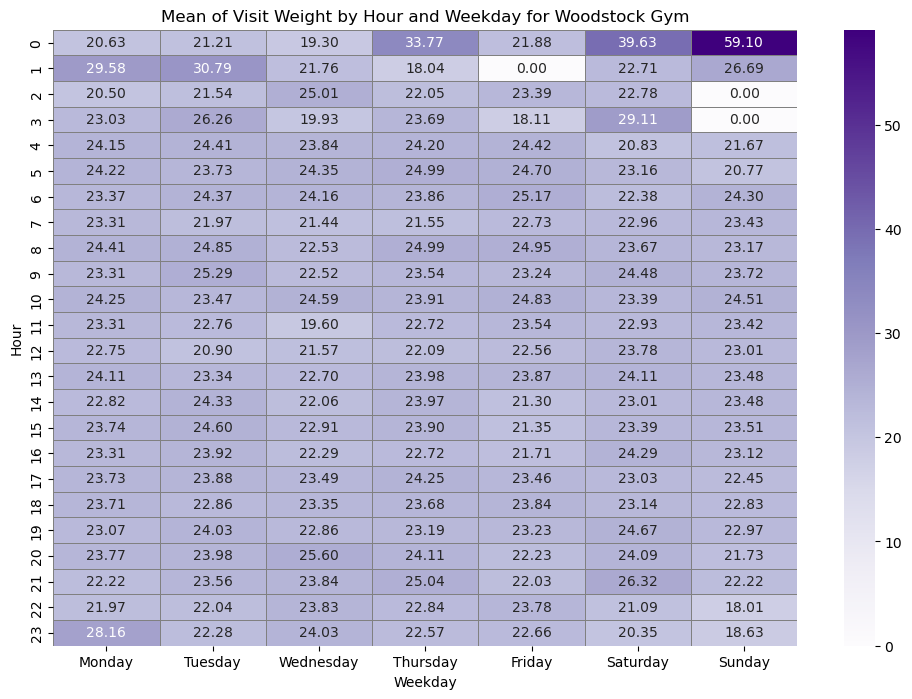

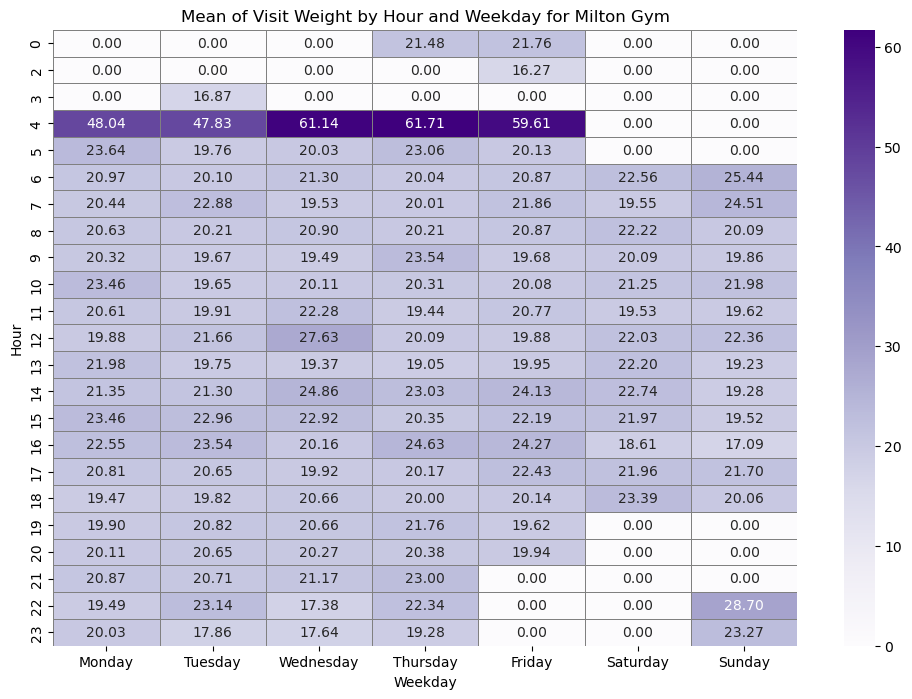

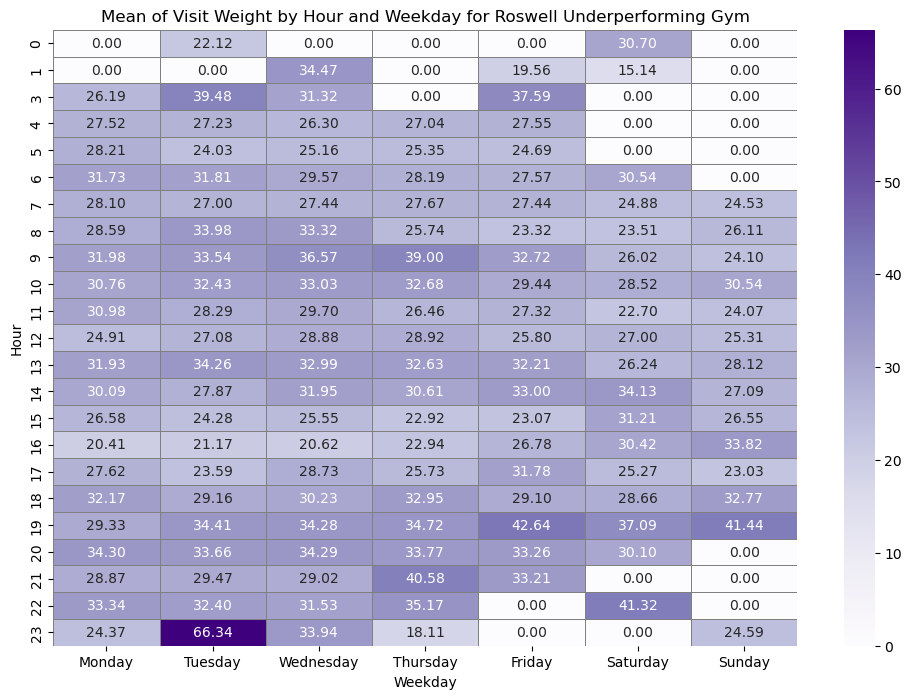

In [11]:
# Function to process gym data and create heatmap plot
def create_heatmap(filename, gym_name):
    # Load data
    df = pd.read_csv(filename)

    # Convert visit_start_time to datetime
    df["visit_start_time"] = pd.to_datetime(df["visit_start_time"])

    # Extract weekday and hour from visit_start_time
    df["weekday"] = df["visit_start_time"].dt.day_name()
    df["hour"] = df["visit_start_time"].dt.hour

    # Group by weekday and hour, then calculate the mean visit_weight
    highlight_table = df.groupby(["weekday", "hour"])["visit_weight"].median().unstack().fillna(0)

    # Reorder weekdays for better visualization
    weekdays_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    highlight_table = highlight_table.reindex(weekdays_order)

    # Transpose the highlight_table to switch axes
    highlight_table = highlight_table.T

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.heatmap(highlight_table, cmap="Purples", annot=True, fmt=".2f", linewidths=0.5, linecolor='grey')

    plt.title(f"Mean of Visit Weight by Hour and Weekday for {gym_name} Gym")
    plt.xlabel("Weekday")
    plt.ylabel("Hour")

    plt.show()

# Create heatmap plot for each gym
for filename, gym_name in zip(gym_filenames, gym_names):
    create_heatmap(filename, gym_name)

There are some strange patterns emerging in this average dataset-- having to do with the weighted field. It shows that 2am Thursday is popular at the Roswell gym. When looking into the data I see that there is one visitor who arrived at the gym at 2:45am to 5:02am on 4.26.2018 has a visit_weight of 326. That weighted value is skewing the data. 

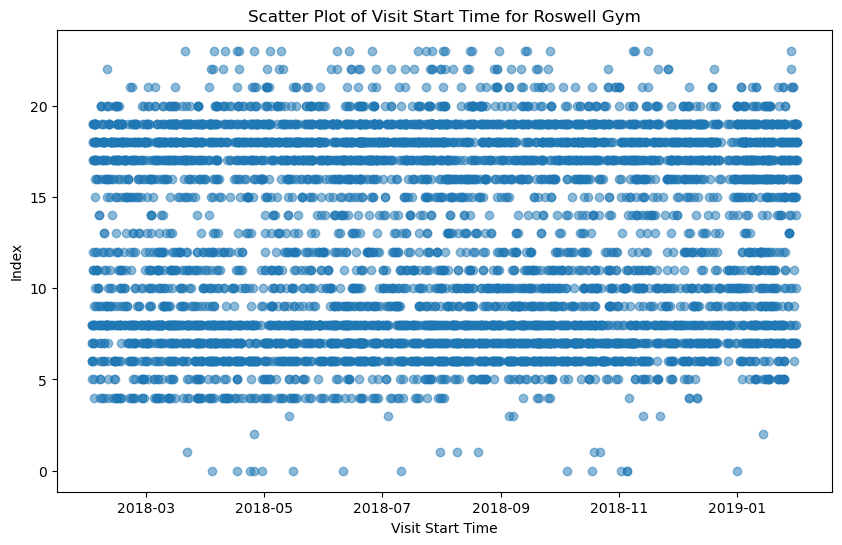

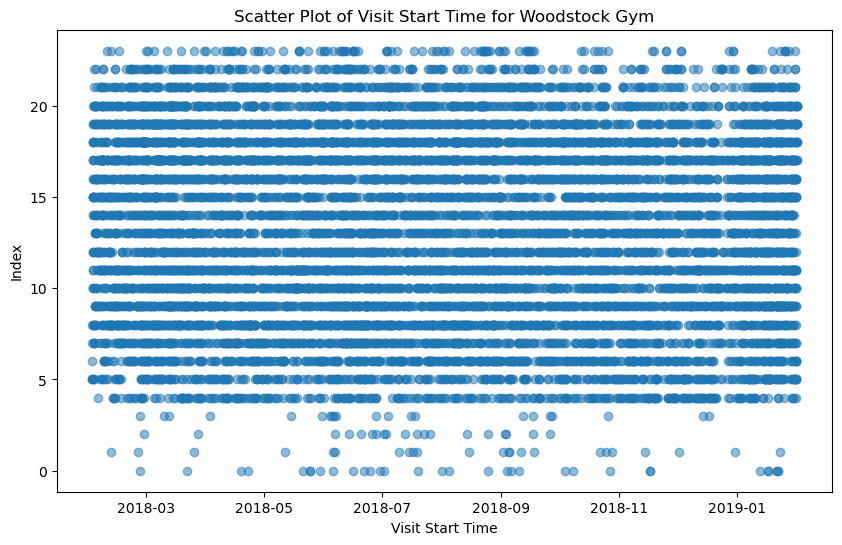

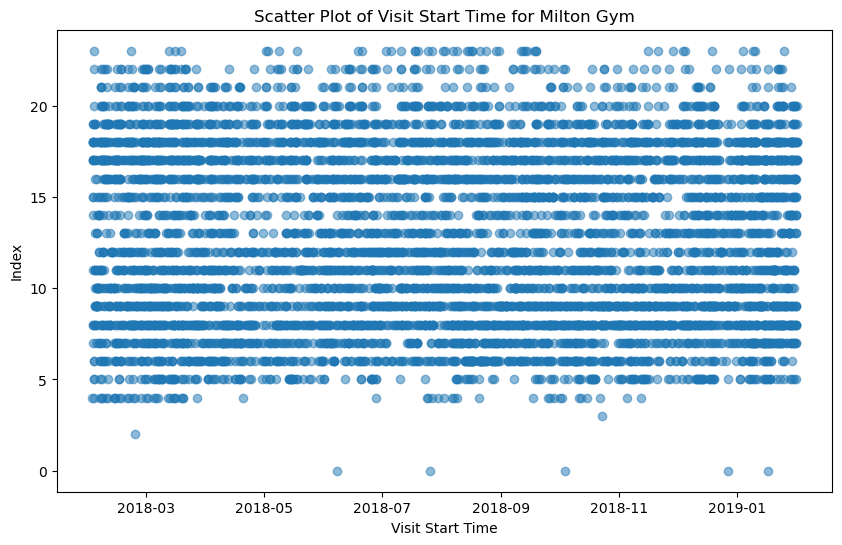

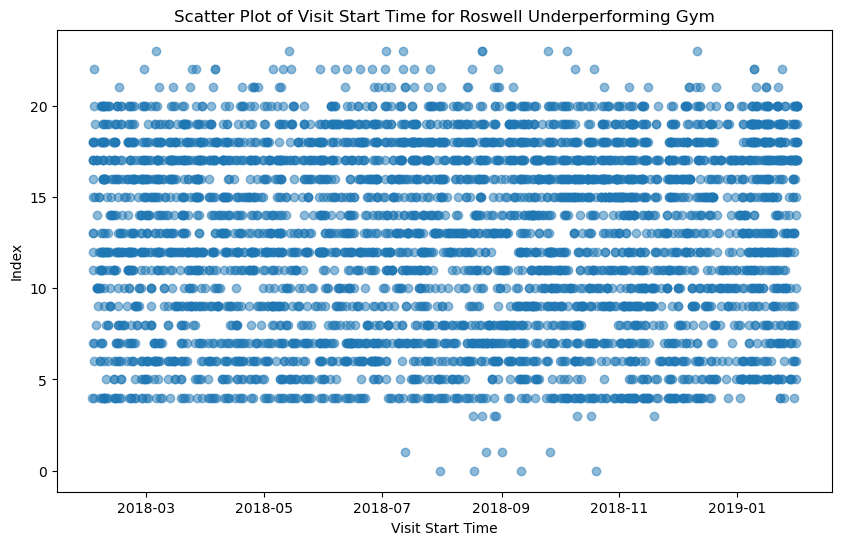

In [12]:
def create_scatter_plot(filename, gym_name):
    # Load data
    df = pd.read_csv(filename)

    # Convert visit_start_time to datetime
    df["visit_start_time"] = pd.to_datetime(df["visit_start_time"])
    df["hour"] = df["visit_start_time"].dt.hour

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(df["visit_start_time"], df["hour"], alpha=0.5)

    plt.title(f"Scatter Plot of Visit Start Time for {gym_name} Gym")
    plt.xlabel("Visit Start Time")
    plt.ylabel("Index")

    plt.show()

# Create scatter plots for each gym
for filename, gym_name in zip(gym_filenames, gym_names):
    create_scatter_plot(filename, gym_name)

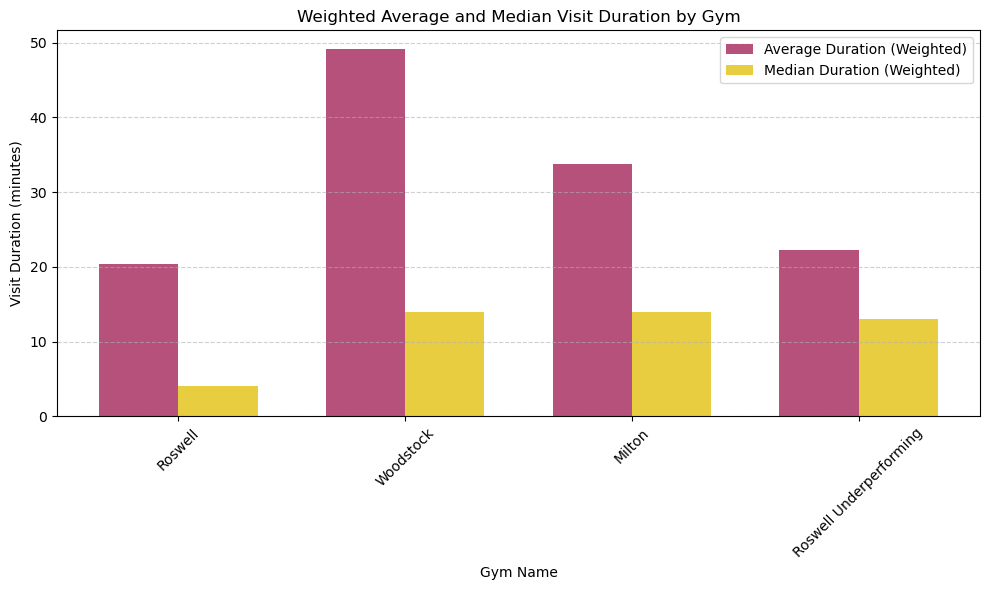

In [13]:
# Function to calculate visit duration and weighted averages/medians
def calculate_durations(df):
  # Convert visit_end_time and visit_start_time to datetime
  df["visit_end_time"] = pd.to_datetime(df["visit_end_time"])
  df["visit_start_time"] = pd.to_datetime(df["visit_start_time"])

  # Calculate visit duration (end time minus start time)
  df["visit_duration"] = df["visit_end_time"] - df["visit_start_time"]

  # Convert visit duration to minutes (assuming duration is in seconds)
  df["visit_duration"] = df["visit_duration"].dt.total_seconds() / 60

  # Calculate visitor weight (number of visitors with that duration)
  df["visitor_weight"] = 1  # Initialize weight as 1 (one visitor)

  # Group by duration and aggregate sum of weights for each duration
  duration_weights = df.groupby("visit_duration")["visitor_weight"].sum()

  # Calculate weighted average and median durations
  average_duration = duration_weights.mean()
  median_duration = duration_weights.median()

  return average_duration, median_duration

# Load data for each gym and calculate durations
gym_averages = []
gym_medians = []
skipped_files = []  # Track skipped files
for filename, gym_name in zip(gym_filenames, gym_names):
  try:
    df = pd.read_csv(filename)
  except FileNotFoundError:
    print(f"Error: File '{filename}' not found. Skipping...")
    skipped_files.append(filename)
    continue

  # Calculate average and median for this gym
  avg_duration, med_duration = calculate_durations(df.copy())
  gym_averages.append(avg_duration)
  gym_medians.append(med_duration)

# Print skipped files for information (optional)
if skipped_files:
  print(f"Skipped files due to missing data: {', '.join(skipped_files)}")

# Ensure gym names and averages/medians have the same length (handle missing data)
if len(gym_names) != len(gym_averages) or len(gym_names) != len(gym_medians):
  raise ValueError("Number of gym names, averages, and medians don't match!")

# Create colormap for bars (customizable)
cmap = colors.LinearSegmentedColormap.from_list("", ["#A4278D", "#F9F72E"])

# Create histogram with average and median durations for each gym
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Adjust bar width for smaller bars
index = range(len(gym_names))  # Create index for bar positions

# Plot average durations
bars1 = plt.bar(index, gym_averages, bar_width, label="Average Duration (Weighted)", color=cmap(0.2))

# Plot median durations with a slight shift for better separation
bars2 = plt.bar([pos + bar_width for pos in index], gym_medians, bar_width, label="Median Duration (Weighted)", color=cmap(0.8))

plt.xlabel("Gym Name")
plt.ylabel("Visit Duration (minutes)")  # Corrected label
plt.title("Weighted Average and Median Visit Duration by Gym")
plt.xticks([i + bar_width / 2 for i in index], gym_names, rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Improve plot aesthetics (optional)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add faint grid lines
plt.tight_layout()  # Improve spacing between elements

plt.show()

6308   0 days 03:43:00
6309   0 days 03:29:00
6310   0 days 03:28:00
6311   0 days 00:59:00
6312   0 days 00:48:00
Name: visit_duration, dtype: timedelta64[ns]
11752   0 days 01:21:00
11753   0 days 00:28:00
11754   0 days 00:29:00
11755   0 days 00:29:00
11756   0 days 01:00:00
Name: visit_duration, dtype: timedelta64[ns]
6985   0 days 01:00:00
6986   0 days 01:04:00
6987   0 days 00:23:00
6988   0 days 00:45:00
6989   0 days 01:03:00
Name: visit_duration, dtype: timedelta64[ns]
4660   0 days 01:30:00
4661   0 days 00:19:00
4662   0 days 00:45:00
4663   0 days 00:44:00
4664   0 days 00:42:00
Name: visit_duration, dtype: timedelta64[ns]


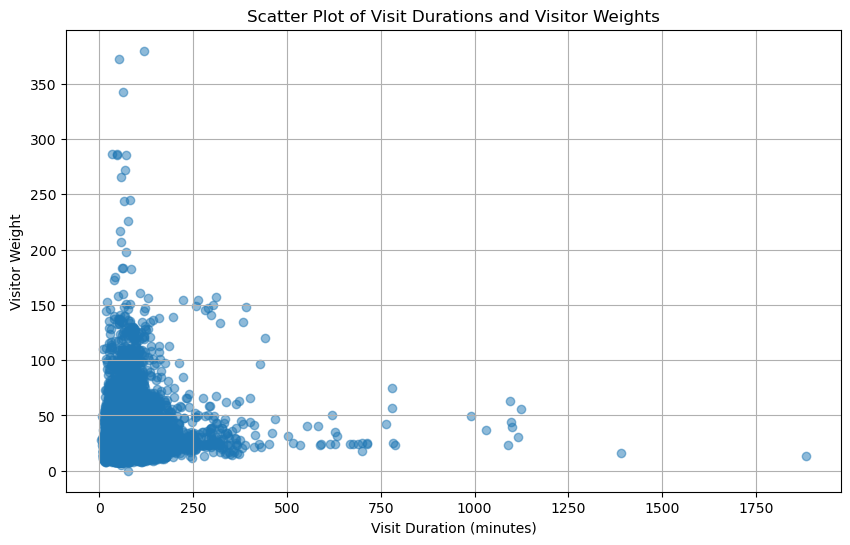

In [14]:
# Function to calculate visit duration and weighted averages/medians
def calculate_durations(df):
    # Convert visit_end_time and visit_start_time to datetime
    df["visit_end_time"] = pd.to_datetime(df["visit_end_time"])
    df["visit_start_time"] = pd.to_datetime(df["visit_start_time"])

    # Calculate visit duration (end time minus start time)
    df["visit_duration"] = df["visit_end_time"] - df["visit_start_time"]
    
    print( df["visit_duration"].tail())

    # Convert visit duration to minutes (assuming duration is in seconds)
    df["visit_duration"] = df["visit_duration"].dt.total_seconds() / 60 

    return df

# Load data for each gym and calculate durations
all_durations = pd.DataFrame()
skipped_files = []  # Track skipped files
for filename, gym_name in zip(gym_filenames, gym_names):
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found. Skipping...")
        skipped_files.append(filename)
        continue

    # Calculate durations for this gym
    durations_df = calculate_durations(df.copy())
    durations_df["Gym Name"] = gym_name  # Add gym name as a column
    all_durations = pd.concat([all_durations, durations_df], ignore_index=True)

# Print skipped files for information (optional)
if skipped_files:
    print(f"Skipped files due to missing data: {', '.join(skipped_files)}")

# Create scatter plot for durations
plt.figure(figsize=(10, 6))
plt.scatter(all_durations["visit_duration"], all_durations["visit_weight"], alpha=0.5)
plt.xlabel("Visit Duration (minutes)")
plt.ylabel("Visitor Weight")
plt.title("Scatter Plot of Visit Durations and Visitor Weights")
plt.grid(True)  # Add grid lines for better visualization

plt.show()


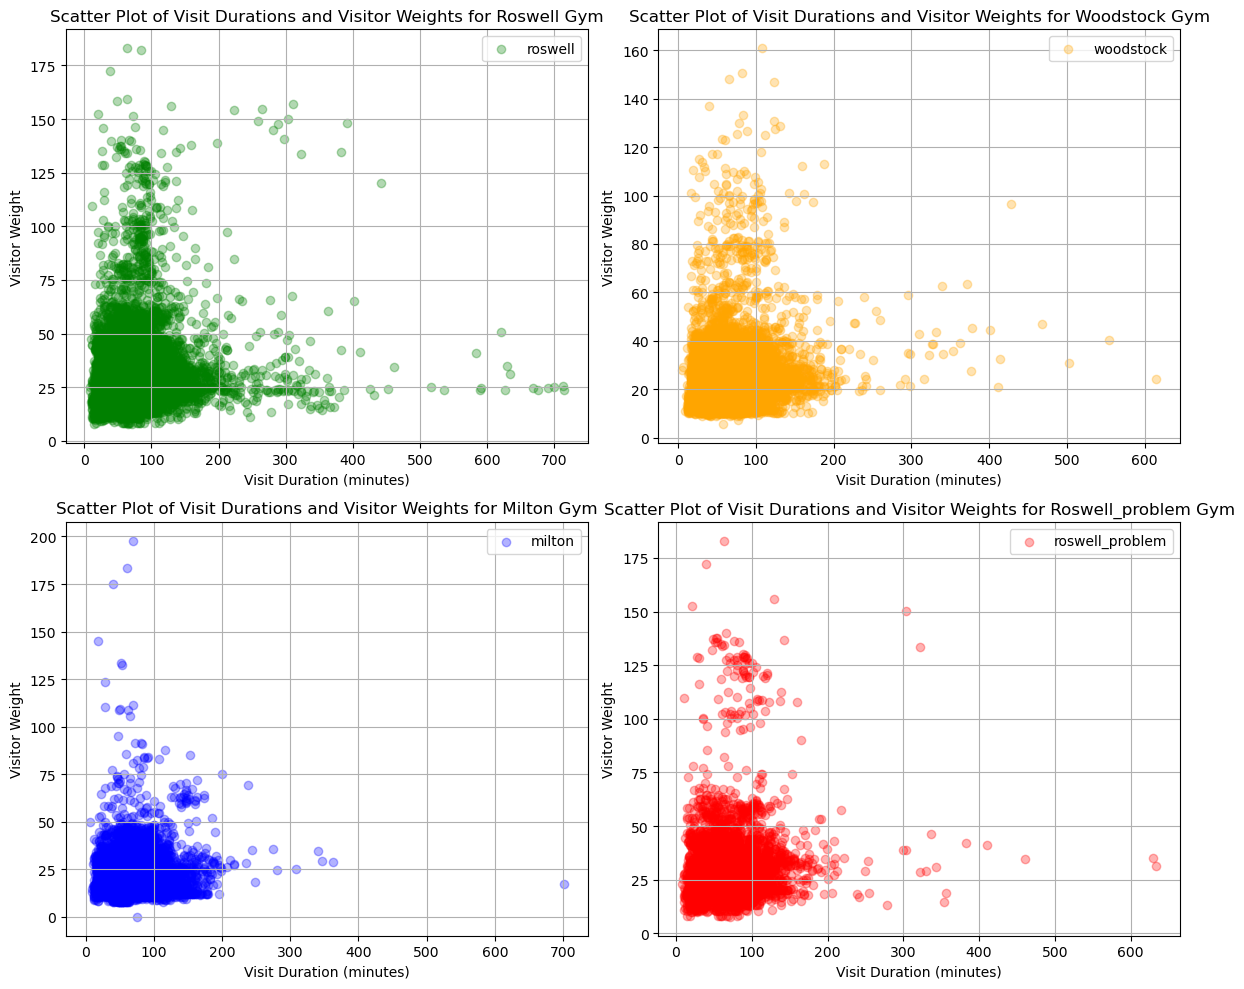

In [15]:
# Function to calculate visit duration and weighted averages/medians
def calculate_durations(df):
    # Convert visit_end_time and visit_start_time to datetime
    df["visit_end_time"] = pd.to_datetime(df["visit_end_time"])
    df["visit_start_time"] = pd.to_datetime(df["visit_start_time"])

    # Calculate visit duration (end time minus start time)
    df["visit_duration"] = df["visit_end_time"] - df["visit_start_time"]

    # Convert visit duration to minutes (assuming duration is in seconds)
    df["visit_duration"] = df["visit_duration"].dt.total_seconds() / 60

    return df

# Update file paths with the directory "data/processed/"
gym_filenames = ["roswell.csv", "woodstock.csv", "milton.csv", "roswell_problem.csv"]
gym_filenames = [os.path.join("data/raw", filename) for filename in gym_filenames]

# Define gym colors
gym_colors = {
    "roswell": "green",
    "woodstock": "orange",
    "milton": "blue",
    "roswell_problem": "red"
}

# Load data for each gym and calculate durations
all_durations = pd.DataFrame()
skipped_files = []  # Track skipped files
for filename in gym_filenames:
    try:
        df = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found. Skipping...")
        skipped_files.append(filename)
        continue

    # Get gym name from filename
    gym_name = os.path.basename(filename).split(".")[0]

    # Calculate durations for this gym
    durations_df = calculate_durations(df.copy())
    durations_df["Gym Name"] = gym_name  # Add gym name as a column
    all_durations = pd.concat([all_durations, durations_df], ignore_index=True)

# Remove outliers past 750 minutes and visitor weights over 200
all_durations = all_durations[(all_durations["visit_duration"] <= 750) & (all_durations["visit_weight"] <= 200)]

# Create four separate scatter plots for each gym's data
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterate over gym colors and plot each gym's data
for gym_name, color in gym_colors.items():
    gym_data = all_durations[all_durations["Gym Name"].str.contains(gym_name)]
    # Determine the subplot position based on gym name
    if gym_name == "roswell":
        ax = axs[0, 0]
    elif gym_name == "woodstock":
        ax = axs[0, 1]
    elif gym_name == "milton":
        ax = axs[1, 0]
    elif gym_name == "roswell_problem":
        ax = axs[1, 1]

    ax.scatter(gym_data["visit_duration"], gym_data["visit_weight"], alpha=0.3, label=gym_name, color=color)
    ax.set_xlabel("Visit Duration (minutes)")
    ax.set_ylabel("Visitor Weight")
    ax.set_title(f"Scatter Plot of Visit Durations and Visitor Weights for {gym_name.capitalize()} Gym")
    ax.legend()
    ax.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [17]:
# Get the number of rows and unique device_ids for each gym
def get_row_and_device_counts(df, gym_name):
    num_rows = df.shape[0]  # Number of rows
    num_unique_device_ids = df['device_id'].nunique()  # Number of unique device_ids
    print(f"Number of rows in {gym_name}: {num_rows}")
    print(f"Number of unique device_ids in {gym_name}: {num_unique_device_ids}")

# Call the function for each gym
get_row_and_device_counts(milton_df.copy(), "Milton")

get_row_and_device_counts(woodstock_df.copy(), "Woodstock")

get_row_and_device_counts(roswell_problem_df.copy(), "Roswell Problem")

get_row_and_device_counts(roswell_df.copy(), "Roswell")

Number of rows in Milton: 6990
Number of unique device_ids in Milton: 899
Number of rows in Woodstock: 11757
Number of unique device_ids in Woodstock: 1665
Number of rows in Roswell Problem: 4665
Number of unique device_ids in Roswell Problem: 654
Number of rows in Roswell: 6313
Number of unique device_ids in Roswell: 2068


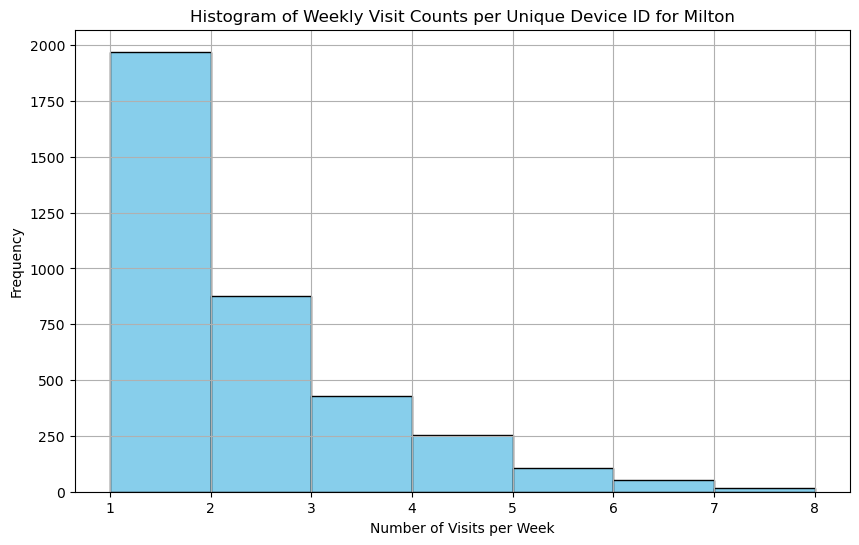

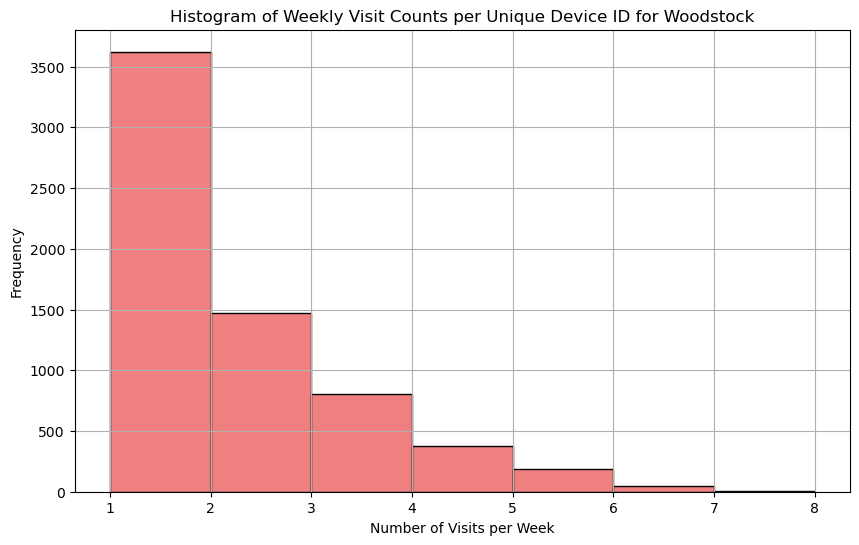

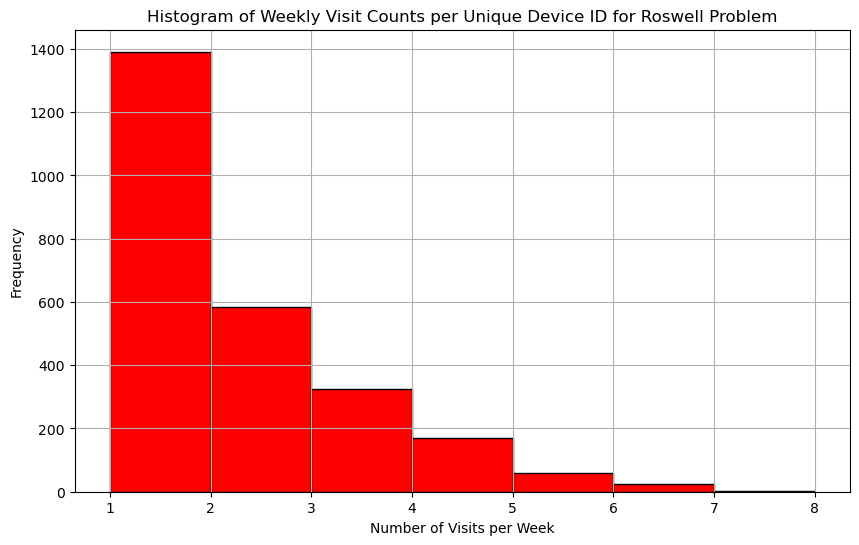

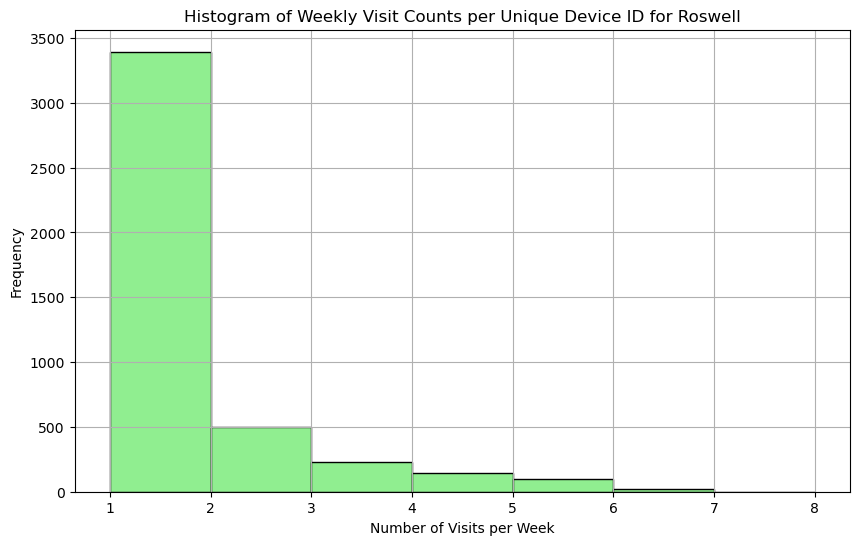

In [18]:
# Function to calculate weekly visit counts for a gym
def calculate_weekly_visits(df):

    # Convert visit_start_time to datetime
    df["visit_end_time"] = pd.to_datetime(df["visit_end_time"])
    
    # Extract ISO year and ISO week number from visit_start_time
    df["iso_year"] = df["visit_end_time"].dt.isocalendar().year
    df["iso_week"] = df["visit_end_time"].dt.isocalendar().week
    
    # Group by device_id, ISO year, and ISO week number, then count the number of visits per week
    weekly_visits = df.groupby(["device_id", "iso_year", "iso_week"]).size().reset_index(name="visit_count")
    
    return weekly_visits

# Function to plot histogram for weekly visit counts
def plot_weekly_visit_histogram(weekly_visits, gym_name, color):
    plt.figure(figsize=(10, 6))
    plt.hist(weekly_visits["visit_count"], bins=range(1, max(weekly_visits["visit_count"]) + 2), color=color, edgecolor='black')
    plt.xlabel("Number of Visits per Week")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Weekly Visit Counts per Unique Device ID for {gym_name}")
    plt.grid(True)
    plt.show()

# Calculate and plot histograms for each gym with different colors
milton_weekly_visits = calculate_weekly_visits(milton_df)
plot_weekly_visit_histogram(milton_weekly_visits, "Milton", color='skyblue')

woodstock_weekly_visits = calculate_weekly_visits(woodstock_df)
plot_weekly_visit_histogram(woodstock_weekly_visits, "Woodstock", color='lightcoral')

roswell_problem_weekly_visits = calculate_weekly_visits(roswell_problem_df)
plot_weekly_visit_histogram(roswell_problem_weekly_visits, "Roswell Problem", color='red')

roswell_weekly_visits = calculate_weekly_visits(roswell_df)
plot_weekly_visit_histogram(roswell_weekly_visits, "Roswell", color='lightgreen')

## Distance from Work and Home

Let's look at how far visitors are traveling from home versus work at each of the gyms. 

In [20]:
gyms_data = [
    ("Milton", 34.10137767, -84.26866763, milton_df),
    ("Woodstock", 34.08340909, -84.53898477, woodstock_df),
    ("Roswell Problem", 34.04246785, -84.34217852, roswell_problem_df),
    ("Roswell", 34.0187544, -84.3118674, roswell_df)
]

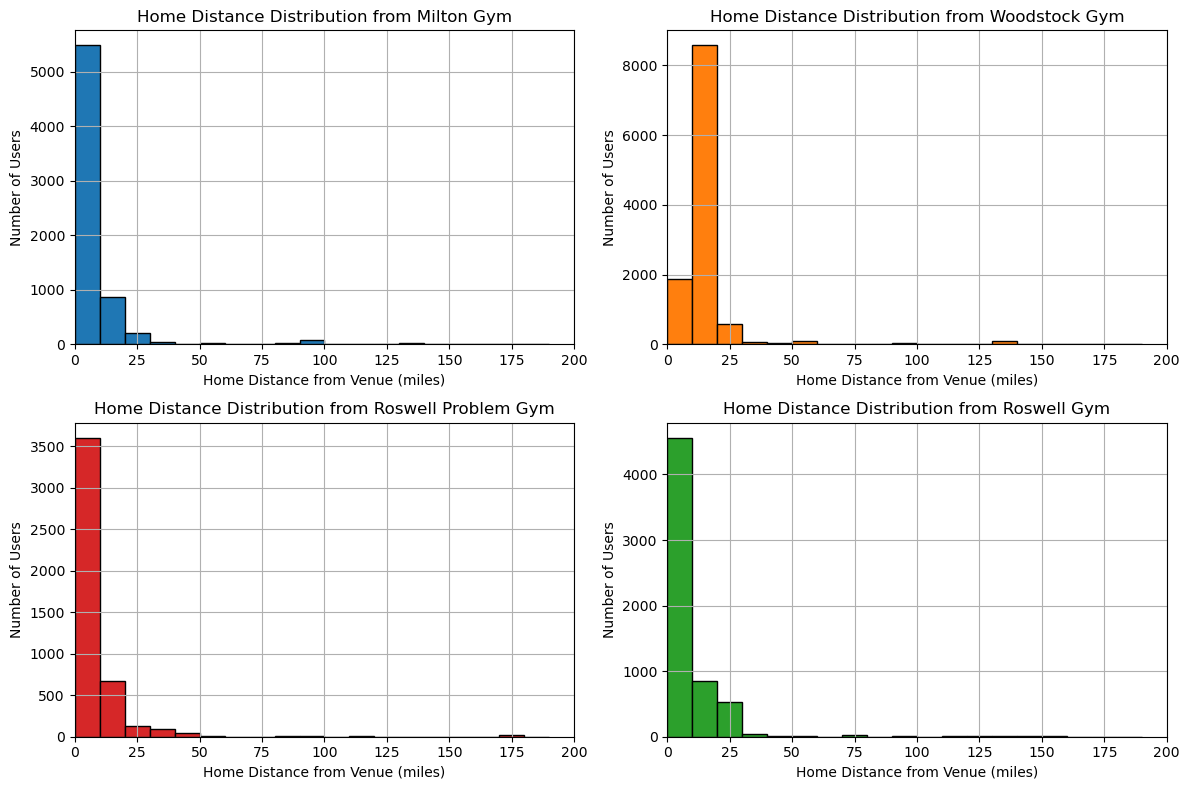

In [27]:
# Define venue coordinates
venue_latitude = 34.04246785
venue_longitude = -84.34217852

# Conversion factor from kilometers to miles
km_to_miles = 0.621371

# Define a more professional color palette
gym_colors = {
    "Milton": "#1f77b4",  # Blue
    "Woodstock": "#ff7f0e",  # Orange
    "Roswell": "#2ca02c",  # Green
    "Roswell Problem": "#d62728"  # Red
}

# Function to calculate distance from venue in miles
def calculate_distance_in_miles(home_latitude, home_longitude):
    # Avoid potential errors from missing data
    if pd.isna(home_latitude) or pd.isna(home_longitude):
        return None

    # Calculate distance using geodesic distance and convert to miles
    distance_in_km = geodesic((venue_latitude, venue_longitude), (home_latitude, home_longitude)).km
    distance_in_miles = distance_in_km * km_to_miles
    return distance_in_miles

# Create a figure for multiple plots
plt.figure(figsize=(12, 8))

# Loop through each gym data
for i, (gym_name, gym_latitude, gym_longitude, gym_df) in enumerate(gyms_data):
    # Calculate distances for each user in the gym's dataset
    distances = []
    for index, row in gym_df.iterrows():
        home_latitude = row["user_home_lat"]
        home_longitude = row["user_home_long"]
        distance = calculate_distance_in_miles(home_latitude, home_longitude)
        if distance:
            distances.append(distance)

    # Check if any distances were calculated
    if not distances:
        print(f"Error: No valid distances calculated for {gym_name}. Check for missing latitude/longitude data.")
        continue

    # Identify and remove outliers (e.g., 3 standard deviations from the mean)
    mean_distance = np.mean(distances)
    std_dev = np.std(distances)
    filtered_distances = [d for d in distances if abs(d - mean_distance) < 3 * std_dev]

    # Filter for distances less than 200 miles
    filtered_distances = [d for d in filtered_distances if d < 200]

    # Create histogram for the gym's data on a subplot, zoomed in on relevant area
    plt.subplot(2, 2, i + 1)
    plt.hist(filtered_distances, bins=np.arange(0, 200, 10), edgecolor='black', color=gym_colors[gym_name])  # Bins in increments of 10 miles
    plt.xlabel("Home Distance from Venue (miles)")
    plt.ylabel("Number of Users")
    plt.title(f"Home Distance Distribution from {gym_name} Gym")
    plt.xlim(0, 200)  # Adjust zoom range
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

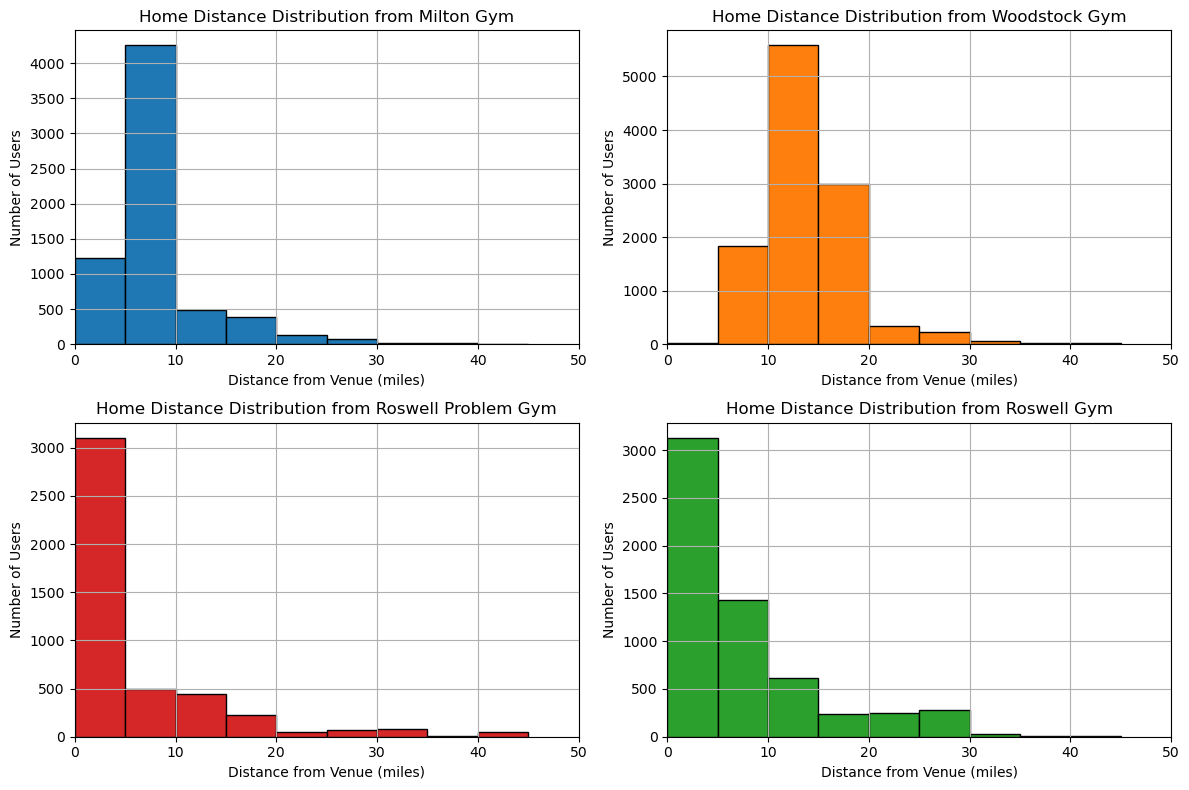

In [28]:
# Create a figure for multiple plots
plt.figure(figsize=(12, 8))

# Loop through each gym data
for i, (gym_name, gym_latitude, gym_longitude, gym_df) in enumerate(gyms_data):
    # Calculate distances for each user in the gym's dataset
    distances = []
    for index, row in gym_df.iterrows():
        home_latitude = row["user_home_lat"]
        home_longitude = row["user_home_long"]
        distance = calculate_distance_in_miles(home_latitude, home_longitude)
        if distance:
            distances.append(distance)

    # Check if any distances were calculated
    if not distances:
        print(f"Error: No valid distances calculated for {gym_name}. Check for missing latitude/longitude data.")
        continue

    # Identify and remove outliers (e.g., 3 standard deviations from the mean)
    mean_distance = np.mean(distances)
    std_dev = np.std(distances)
    filtered_distances = [d for d in distances if abs(d - mean_distance) < 3 * std_dev]

    # Filter for distances less than 50 miles
    filtered_distances = [d for d in filtered_distances if d < 50]

    # Create histogram for the gym's data on a subplot, with specified colors
    plt.subplot(2, 2, i + 1)
    plt.hist(filtered_distances, bins=np.arange(0, 50, 5), edgecolor='black', color=gym_colors[gym_name])  # Use specified color
    plt.xlabel("Distance from Venue (miles)")
    plt.ylabel("Number of Users")
    plt.title(f"Home Distance Distribution from {gym_name} Gym")
    plt.xlim(0, 50)  # Adjust zoom range
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


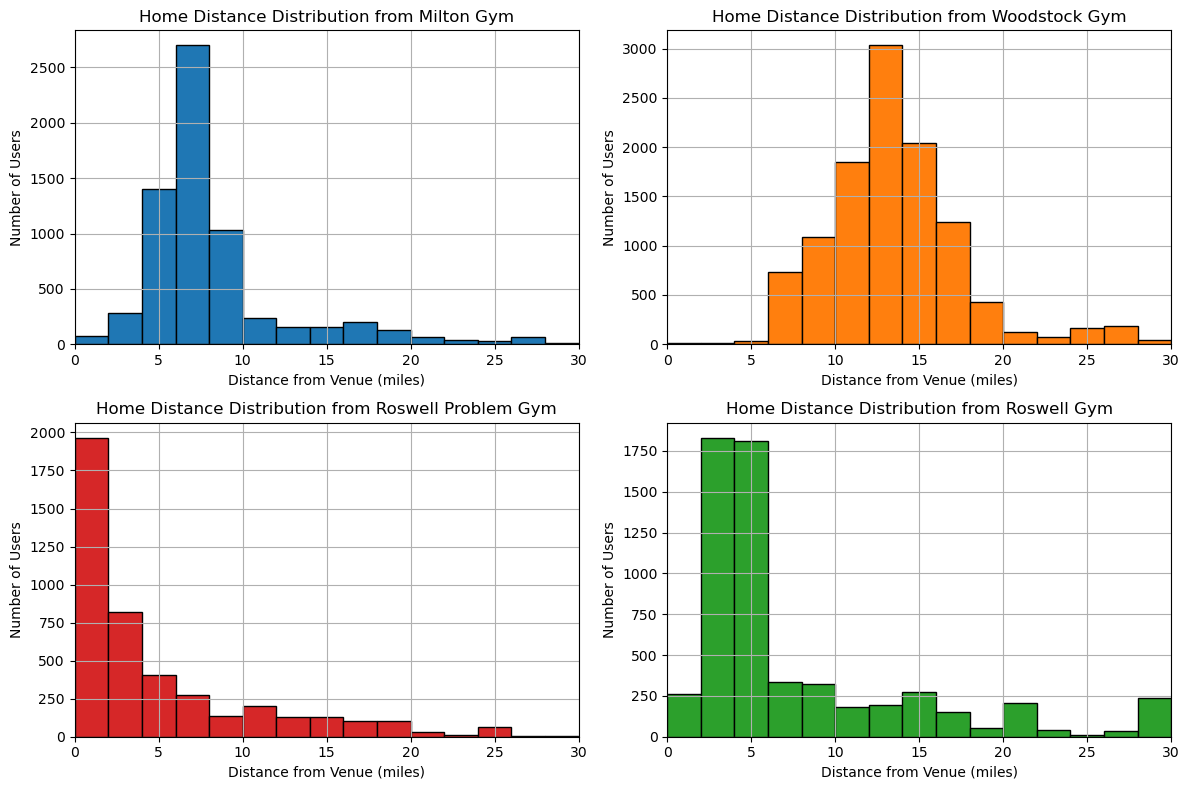

In [29]:
# Create a figure for multiple plots
plt.figure(figsize=(12, 8))

# Loop through each gym data
for i, (gym_name, gym_latitude, gym_longitude, gym_df) in enumerate(gyms_data):
    # Calculate distances for each user in the gym's dataset
    distances = []
    for index, row in gym_df.iterrows():
        home_latitude = row["user_home_lat"]
        home_longitude = row["user_home_long"]
        distance = calculate_distance_in_miles(home_latitude, home_longitude)
        if distance:
            distances.append(distance)

    # Check if any distances were calculated
    if not distances:
        print(f"Error: No valid distances calculated for {gym_name}. Check for missing latitude/longitude data.")
        continue

    # Identify and remove outliers (e.g., 3 standard deviations from the mean)
    mean_distance = np.mean(distances)
    std_dev = np.std(distances)
    filtered_distances = [d for d in distances if abs(d - mean_distance) < 3 * std_dev]

    # Filter for distances less than 30 miles
    filtered_distances = [d for d in filtered_distances if d < 30]

    # Create histogram for the gym's data on a subplot, with specified colors
    plt.subplot(2, 2, i + 1)
    plt.hist(filtered_distances, bins=np.arange(0, 31, 2), edgecolor='black', color=gym_colors[gym_name])  # Adjusted bins
    plt.xlabel("Distance from Venue (miles)")
    plt.ylabel("Number of Users")
    plt.title(f"Home Distance Distribution from {gym_name} Gym")
    plt.xlim(0, 30)  # Adjust zoom range
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


Index(['device_id', 'visit_id', 'venue_id', 'visit_end_time', 'visit_lat',
       'visit_long', 'visit_weight', 'customer_weight', 'user_home_lat',
       'user_home_long', 'user_work_lat', 'user_work_long', 'gym_name',
       'iso_year', 'iso_week'],
      dtype='object')
Cleaned data saved to 'data/processed/Milton_cleaned.csv'


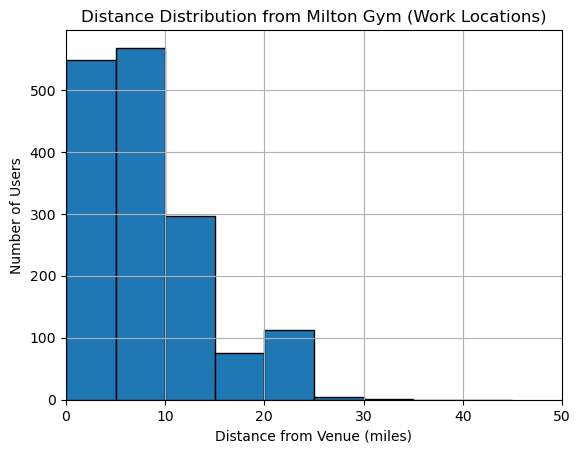

Cleaned data saved to 'data/processed/Woodstock_cleaned.csv'


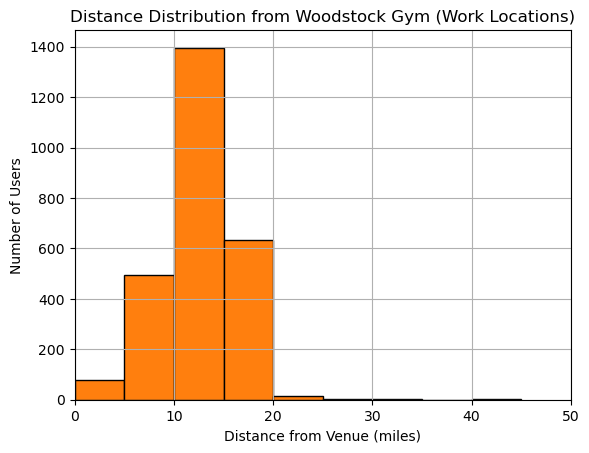

Cleaned data saved to 'data/processed/Roswell Problem_cleaned.csv'


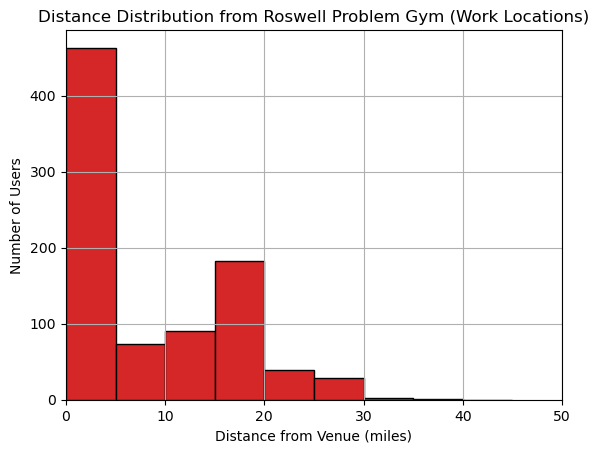

Cleaned data saved to 'data/processed/Roswell_cleaned.csv'


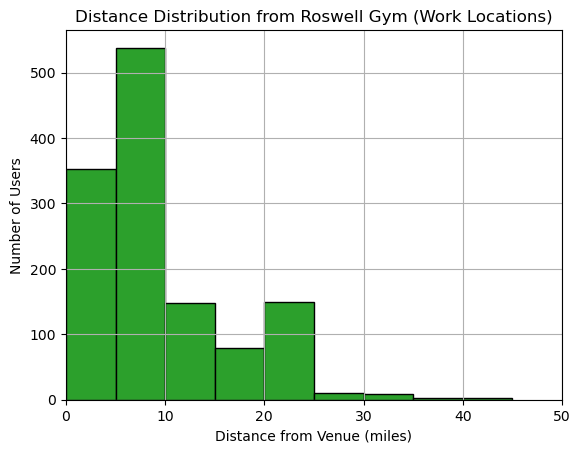

In [31]:

# # Function to calculate distance from venue in miles
# def calculate_distance_in_miles(home_latitude, home_longitude):
#     # Avoid potential errors from missing data
#     if pd.isna(home_latitude) or pd.isna(home_longitude):
#         return None

#     # Calculate distance using geodesic distance and convert to miles
#     distance_in_km = geodesic((venue_latitude, venue_longitude), (home_latitude, home_longitude)).km
#     distance_in_miles = distance_in_km * km_to_miles
#     return distance_in_miles

# # Gyms data (dataset, latitude, longitude)
# gyms_data = [
#     ("Milton", 34.10137767, -84.26866763, milton_df),
#     ("Woodstock", 34.08340909, -84.53898477, woodstock_df),
#     ("Roswell Problem", 34.04246785, -84.34217852, roswell_problem_df),
#     ("Roswell", 34.0187544, -84.3118674, roswell_df)
# ]

# Loop through each gym data
print(gym_df.columns)
for gym_name, gym_latitude, gym_longitude, gym_df in gyms_data:
    # Clean up rows and calculate distance for each user
    cleaned_rows = []
    for index, row in gym_df.iterrows():
        user_home_lat = row["user_home_lat"]
        user_home_long = row["user_home_long"]
        user_work_lat = row["user_work_lat"]
        user_work_long = row["user_work_long"]
        customer_weight = row["customer_weight"]

        # Calculate distance from venue for work location
        work_distance = calculate_distance_in_miles(user_work_lat, user_work_long)

        # Keep rows with valid work distances and customer weights
        if work_distance is not None and customer_weight > 0:
            cleaned_rows.append({
                "user_home_lat": user_home_lat,
                "user_home_long": user_home_long,
                "user_work_lat": user_work_lat,
                "user_work_long": user_work_long,
                "customer_weight": customer_weight,
                "work_distance": work_distance
            })

    # Create DataFrame from cleaned rows
    cleaned_df = pd.DataFrame(cleaned_rows)

    # Write cleaned DataFrame to file
    cleaned_filename = f"{gym_name}_cleaned.csv"
    cleaned_df.to_csv(cleaned_filename, index=False)
    print(f"Cleaned data saved to 'data/processed/{cleaned_filename}'")

    # Plot histogram for work distances
    plt.hist(cleaned_df["work_distance"], bins=np.arange(0, 50, 5), edgecolor='black', color=gym_colors[gym_name])
    plt.xlabel("Distance from Venue (miles)")
    plt.ylabel("Number of Users")
    plt.title(f"Distance Distribution from {gym_name} Gym (Work Locations)")
    plt.xlim(0, 50)  # Adjust zoom range
    plt.grid(True)
    plt.show()

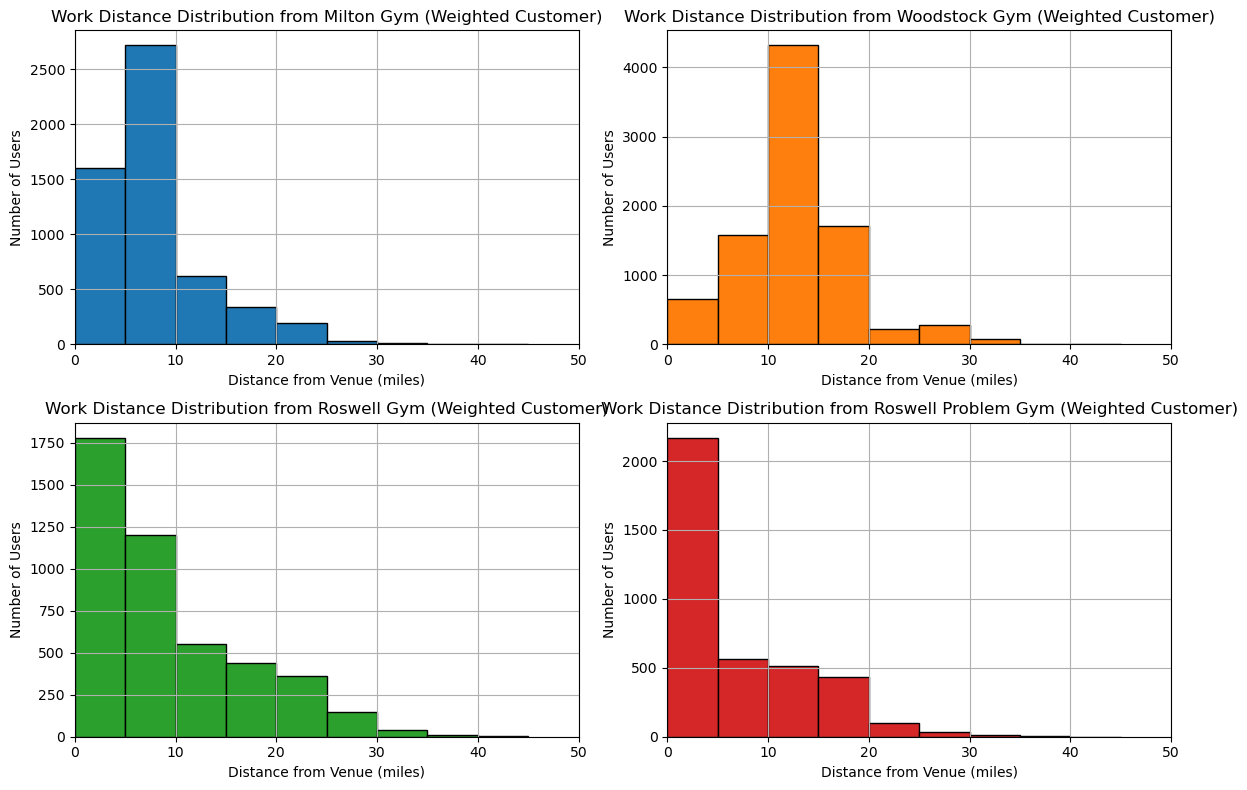

In [32]:
# Conversion factor from kilometers to miles
km_to_miles = 0.621371

# Function to calculate distance from venue in miles
def calculate_distance_in_miles(home_latitude, home_longitude):
    # Avoid potential errors from missing data
    if pd.isna(home_latitude) or pd.isna(home_longitude):
        return None

    # Calculate distance using geodesic distance and convert to miles
    distance_in_km = geodesic((venue_latitude, venue_longitude), (home_latitude, home_longitude)).km
    distance_in_miles = distance_in_km * km_to_miles
    return distance_in_miles

# Gyms data (dataset, latitude, longitude)
gyms_data = [
    ("Milton", 34.10137767, -84.26866763, milton_df),
    ("Woodstock", 34.08340909, -84.53898477, woodstock_df),
    ("Roswell", 34.0187544, -84.3118674, roswell_df),
    ("Roswell Problem", 34.04246785, -84.34217852, roswell_problem_df)
]

# Create a figure for multiple plots
plt.figure(figsize=(12, 8))

# Loop through each gym data
for i, (gym_name, gym_latitude, gym_longitude, gym_df) in enumerate(gyms_data):
    # Calculate distances and weights for each user
    distances = []
    weights = []
    for index, row in gym_df.iterrows():
        work_latitude = row["user_work_lat"]  # Use user_work_lat
        work_longitude = row["user_work_long"]  # Use user_work_long
        distance = calculate_distance_in_miles(work_latitude, work_longitude)
        weight = row["customer_weight"]  # Use customer_weight for visitor count
        if distance:
            distances.append(distance)
            weights.append(weight)

    # Check if any data was collected
    if not distances:
        print(f"Error: No valid data calculated for {gym_name}. Check for missing data.")
        continue

    # Identify and remove outliers (e.g., 3 standard deviations from the mean)
    mean_distance = np.mean(distances)
    std_dev = np.std(distances)
    filtered_distances = [d for d, w in zip(distances, weights) if abs(d - mean_distance) < 3 * std_dev]
    filtered_weights = [w for d, w in zip(distances, weights) if abs(d - mean_distance) < 3 * std_dev]

    # Filter for distances less than 50 miles
    filtered_distances = [d for d, w in zip(filtered_distances, filtered_weights) if d < 50]
    # Ensure weights have the same length as distances (replace 0 weights with 1)
    filtered_weights = [max(w, 1) for w in filtered_weights[:len(filtered_distances)]]  # Limit weights to distance list length

    # Create histogram for the gym's data on a subplot, with colorful bars
    plt.subplot(2, 2, i + 1)
    plt.hist(filtered_distances, bins=np.arange(0, 50, 5), edgecolor='black', color=gym_colors[gym_name])  # Use colormap for bars
    plt.xlabel("Distance from Venue (miles)")
    plt.ylabel("Number of Users")
    plt.title(f"Work Distance Distribution from {gym_name} Gym (Weighted Customer)")
    plt.xlim(0, 50)  # Adjust zoom range
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

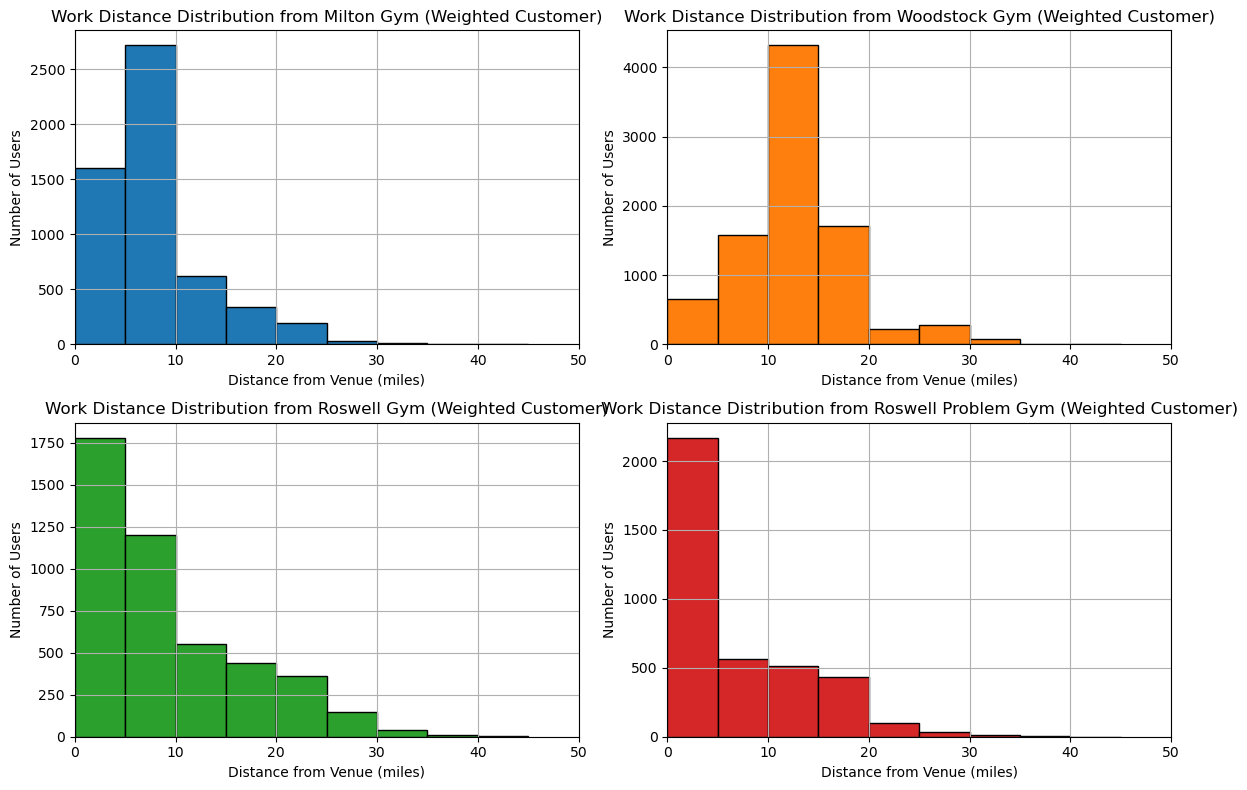

In [33]:
# Conversion factor from kilometers to miles
km_to_miles = 0.621371

# Function to calculate distance from venue in miles
def calculate_distance_in_miles(home_latitude, home_longitude):
    # Avoid potential errors from missing data
    if pd.isna(home_latitude) or pd.isna(home_longitude):
        return None

    # Calculate distance using geodesic distance and convert to miles
    distance_in_km = geodesic((venue_latitude, venue_longitude), (home_latitude, home_longitude)).km
    distance_in_miles = distance_in_km * km_to_miles
    return distance_in_miles

# Gyms data (dataset, latitude, longitude)
gyms_data = [
    ("Milton", 34.10137767, -84.26866763, milton_df),
    ("Woodstock", 34.08340909, -84.53898477, woodstock_df),
    ("Roswell", 34.0187544, -84.3118674, roswell_df),
    ("Roswell Problem", 34.04246785, -84.34217852, roswell_problem_df)
]

# Create a figure for multiple plots
plt.figure(figsize=(12, 8))

# Loop through each gym data
for i, (gym_name, gym_latitude, gym_longitude, gym_df) in enumerate(gyms_data):
    # Calculate distances and weights for each user
    distances = []
    weights = []
    for index, row in gym_df.iterrows():
        work_latitude = row["user_work_lat"]  # Use user_work_lat
        work_longitude = row["user_work_long"]  # Use user_work_long
        distance = calculate_distance_in_miles(work_latitude, work_longitude)
        weight = row["customer_weight"]  # Use customer_weight for visitor count
        if distance:
            distances.append(distance)
            weights.append(weight)

    # Check if any data was collected
    if not distances:
        print(f"Error: No valid data calculated for {gym_name}. Check for missing data.")
        continue

    # Identify and remove outliers (e.g., 3 standard deviations from the mean)
    mean_distance = np.mean(distances)
    std_dev = np.std(distances)
    filtered_distances = [d for d, w in zip(distances, weights) if abs(d - mean_distance) < 3 * std_dev]
    filtered_weights = [w for d, w in zip(distances, weights) if abs(d - mean_distance) < 3 * std_dev]

    # Filter for distances less than 50 miles
    filtered_distances = [d for d, w in zip(filtered_distances, filtered_weights) if d < 50]
    # Ensure weights have the same length as distances (replace 0 weights with 1)
    filtered_weights = [max(w, 1) for w in filtered_weights[:len(filtered_distances)]]  # Limit weights to distance list length

    # Create histogram for the gym's data on a subplot, with colorful bars
    plt.subplot(2, 2, i + 1)
    plt.hist(filtered_distances, bins=np.arange(0, 50, 5), edgecolor='black', color=gym_colors[gym_name]) # Use colormap for bars
    plt.xlabel("Distance from Venue (miles)")
    plt.ylabel("Number of Users")
    plt.title(f"Work Distance Distribution from {gym_name} Gym (Weighted Customer)")
    plt.xlim(0, 50)  # Adjust zoom range
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
# Create a figure for multiple plots
plt.figure(figsize=(12, 8))

# Loop through each gym data
for i, (gym_name, gym_latitude, gym_longitude, gym_df) in enumerate(gyms_data):
    # Calculate distances and weights for each user
    distances = []
    weights = []
    for index, row in gym_df.iterrows():
        work_latitude = row["user_work_lat"]  # Use user_work_lat
        work_longitude = row["user_work_long"]  # Use user_work_long
        distance = calculate_distance_in_miles(work_latitude, work_longitude)
        weight = row["customer_weight"]  # Use customer_weight for visitor count
        if distance:
            distances.append(distance)
            weights.append(weight)

    # Check if any data was collected
    if not distances:
        print(f"Error: No valid data calculated for {gym_name}. Check for missing data.")
        continue

    # Identify and remove outliers (e.g., 3 standard deviations from the mean)
    mean_distance = np.mean(distances)
    std_dev = np.std(distances)
    filtered_distances = [d for d, w in zip(distances, weights) if abs(d - mean_distance) < 3 * std_dev]
    filtered_weights = [w for d, w in zip(distances, weights) if abs(d - mean_distance) < 3 * std_dev]

    # Filter for distances less than 5 miles
    filtered_distances = [d for d, w in zip(filtered_distances, filtered_weights) if d < 5]
    # Ensure weights have the same length as distances (replace 0 weights with 1)
    filtered_weights = [max(w, 1) for w in filtered_weights[:len(filtered_distances)]]  # Limit weights to distance list length

    # Create histogram for the gym's data on a subplot, with colorful bars
    plt.subplot(2, 2, i + 1)
    plt.hist(filtered_distances, bins=np.arange(0, 5, 0.5), edgecolor='black', color=gym_colors[gym_name])  # Use colormap for bars
    plt.xlabel("Distance from Venue (miles)")
    plt.ylabel("Number of Users")
    plt.title(f"Work Distance Distribution from {gym_name} Gym (Weighted Customer)")
    plt.xlim(0, 5)  # Adjust zoom range
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


## Distances from work

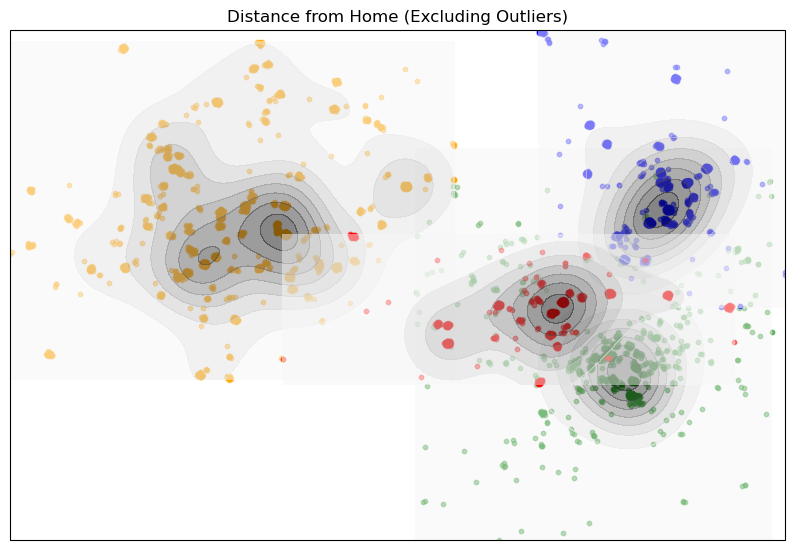

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import cartopy.crs as ccrs

# List of cleaned gym files with corresponding colors
gym_files_colors = {
    "Roswell_cleaned.csv": "green",
    "Woodstock_cleaned.csv": "orange",
    "Milton_cleaned.csv": "blue",
    "Roswell Problem_cleaned.csv": "red"
}

# Create a figure
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Iterate through each gym file
for gym_file, color in gym_files_colors.items():
    # Read cleaned CSV file into pandas DataFrame
    df = pd.read_csv(gym_file)

    # Filter out missing values
    df.dropna(subset=['user_home_lat', 'user_home_long'], inplace=True)

    # Optionally filter outliers using IQR method
    Q1_lat = df['user_home_lat'].quantile(0.25)
    Q3_lat = df['user_home_lat'].quantile(0.75)
    IQR_lat = Q3_lat - Q1_lat

    Q1_lng = df['user_home_long'].quantile(0.25)
    Q3_lng = df['user_home_long'].quantile(0.75)
    IQR_lng = Q3_lng - Q1_lng

    lower_bound_lat = Q1_lat - 1.5 * IQR_lat
    upper_bound_lat = Q3_lat + 1.5 * IQR_lat

    lower_bound_lng = Q1_lng - 1.5 * IQR_lng
    upper_bound_lng = Q3_lng + 1.5 * IQR_lng

    # Filter outliers
    df_filtered = df[(df['user_home_lat'] >= lower_bound_lat) & (df['user_home_lat'] <= upper_bound_lat) &
                     (df['user_home_long'] >= lower_bound_lng) & (df['user_home_long'] <= upper_bound_lng)]

    # Extract latitude and longitude columns
    latitudes = df_filtered['user_home_lat'].values
    longitudes = df_filtered['user_home_long'].values

    # Perform Kernel Density Estimation
    kde = KernelDensity(bandwidth=0.02, kernel='gaussian')
    kde.fit(np.vstack([latitudes, longitudes]).T)

    # Create a grid of points for density estimation
    grid_points = np.linspace(min(latitudes), max(latitudes), 100), np.linspace(min(longitudes), max(longitudes), 100)
    grid_latitudes, grid_longitudes = np.meshgrid(*grid_points)
    grid_coordinates = np.vstack([grid_latitudes.ravel(), grid_longitudes.ravel()]).T
    density_values = np.exp(kde.score_samples(grid_coordinates))

    # Plot KDE density estimation
    ax.scatter(longitudes, latitudes, transform=ccrs.PlateCarree(), s=10, c=color, alpha=0.5)  # Plot original points
    ax.contourf(grid_longitudes, grid_latitudes, density_values.reshape(100, 100), cmap='Greys', alpha=0.5,
                transform=ccrs.PlateCarree())  # Plot KDE density

# Set title and show the plot
plt.title('Distance from Home (Excluding Outliers)')
plt.show()


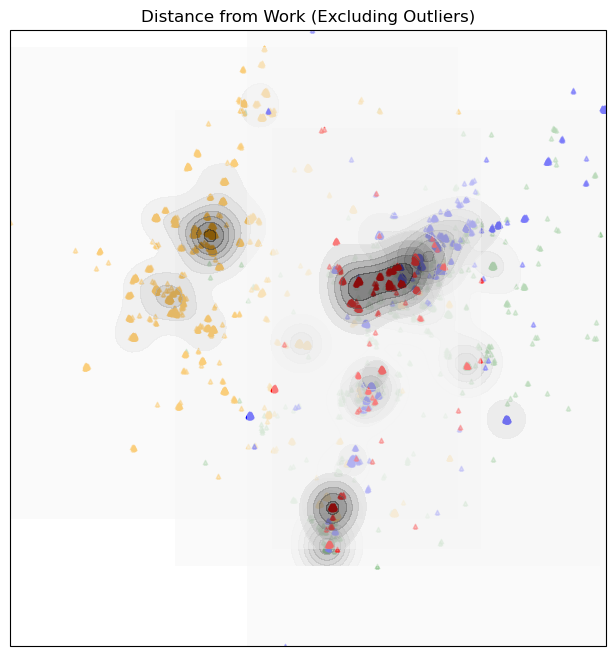

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import cartopy.crs as ccrs

# List of cleaned gym files with corresponding colors
gym_files_colors = {
    "Roswell_cleaned.csv": "green",
    "Woodstock_cleaned.csv": "orange",
    "Milton_cleaned.csv": "blue",
    "Roswell Problem_cleaned.csv": "red"
}

# Create a figure
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Iterate through each gym file
for gym_file, color in gym_files_colors.items():
    # Read cleaned CSV file into pandas DataFrame
    df = pd.read_csv(gym_file)

    # Filter out missing values
    df.dropna(subset=['user_work_lat', 'user_work_long'], inplace=True)

    # Optionally filter outliers using IQR method
    Q1_lat = df['user_work_lat'].quantile(0.25)
    Q3_lat = df['user_work_lat'].quantile(0.75)
    IQR_lat = Q3_lat - Q1_lat

    Q1_lng = df['user_work_long'].quantile(0.25)
    Q3_lng = df['user_work_long'].quantile(0.75)
    IQR_lng = Q3_lng - Q1_lng

    lower_bound_lat = Q1_lat - 1.5 * IQR_lat
    upper_bound_lat = Q3_lat + 1.5 * IQR_lat

    lower_bound_lng = Q1_lng - 1.5 * IQR_lng
    upper_bound_lng = Q3_lng + 1.5 * IQR_lng

    # Filter outliers
    df_filtered = df[(df['user_work_lat'] >= lower_bound_lat) & (df['user_work_lat'] <= upper_bound_lat) &
                     (df['user_work_long'] >= lower_bound_lng) & (df['user_work_long'] <= upper_bound_lng)]

    # Extract latitude and longitude columns
    latitudes = df_filtered['user_work_lat'].values
    longitudes = df_filtered['user_work_long'].values

    # Perform Kernel Density Estimation
    kde = KernelDensity(bandwidth=0.02, kernel='gaussian')
    kde.fit(np.vstack([latitudes, longitudes]).T)

    # Create a grid of points for density estimation
    grid_points = np.linspace(min(latitudes), max(latitudes), 100), np.linspace(min(longitudes), max(longitudes), 100)
    grid_latitudes, grid_longitudes = np.meshgrid(*grid_points)
    grid_coordinates = np.vstack([grid_latitudes.ravel(), grid_longitudes.ravel()]).T
    density_values = np.exp(kde.score_samples(grid_coordinates))

    # Plot KDE density estimation
    ax.scatter(longitudes, latitudes, transform=ccrs.PlateCarree(), marker='^', s=10, c=color, alpha=0.5)  # Plot original points
    ax.contourf(grid_longitudes, grid_latitudes, density_values.reshape(100, 100), cmap='Greys', alpha=0.5,
                transform=ccrs.PlateCarree())  # Plot KDE density

# Set title and show the plot
plt.title('Distance from Work (Excluding Outliers)')
plt.show()


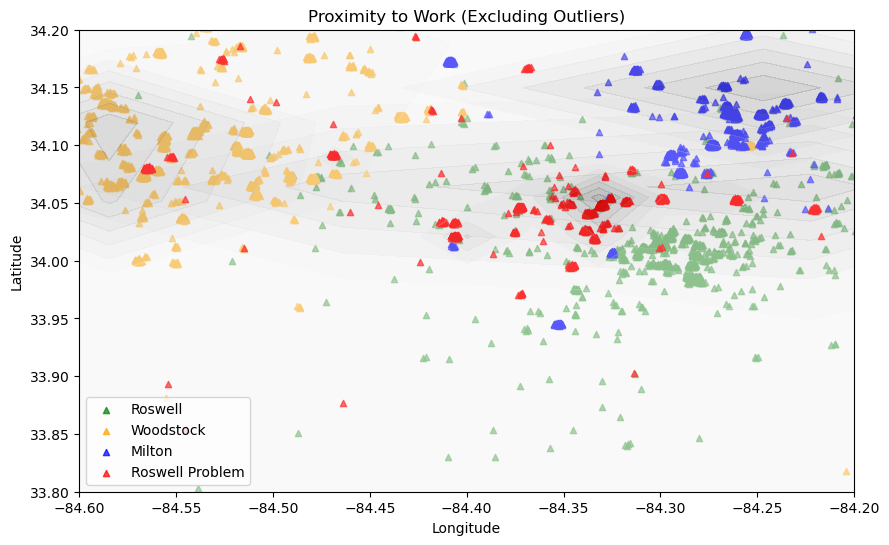

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# List of cleaned gym files with corresponding colors
gym_files_colors = {
    "Roswell_cleaned.csv": "green",
    "Woodstock_cleaned.csv": "orange",
    "Milton_cleaned.csv": "blue",
    "Roswell Problem_cleaned.csv": "red"
}

# Define a figure without basemap elements
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size for a wider map

for gym_file, color in gym_files_colors.items():
    # Read cleaned CSV file into pandas DataFrame
    df = pd.read_csv(gym_file)

    # Filter out missing values
    df.dropna(subset=['user_home_lat', 'user_home_long'], inplace=True)

    # Extract latitude and longitude columns
    latitudes = df['user_home_lat'].values
    longitudes = df['user_home_long'].values

    # Perform Kernel Density Estimation
    kde = KernelDensity(bandwidth=0.01, kernel='gaussian')
    kde.fit(np.vstack([latitudes, longitudes]).T)

    # Create a grid of points for density estimation (adjust resolution as needed)
    grid_points = np.linspace(min(latitudes), max(latitudes), 200), np.linspace(min(longitudes), max(longitudes), 200)
    grid_latitudes, grid_longitudes = np.meshgrid(*grid_points)
    grid_coordinates = np.vstack([grid_latitudes.ravel(), grid_longitudes.ravel()]).T
    density_values = np.exp(kde.score_samples(grid_coordinates))

    # Plot the KDE density estimation as scatter plot
    plt.scatter(longitudes, latitudes, s=20, marker='^', c=color, alpha=0.7, label=gym_file.replace("_cleaned.csv", ""))

    # Plot the KDE density (optional, adjust transparency as needed)
    plt.contourf(grid_longitudes, grid_latitudes, density_values.reshape(200, 200), cmap='Greys', alpha=0.2)

# Set limits based on the desired zoomed-in area
plt.xlim([-84.6, -84.2])  # Adjust as needed
plt.ylim([33.8, 34.2])    # Adjust as needed

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Proximity to Work (Excluding Outliers)')
plt.legend()

plt.show()


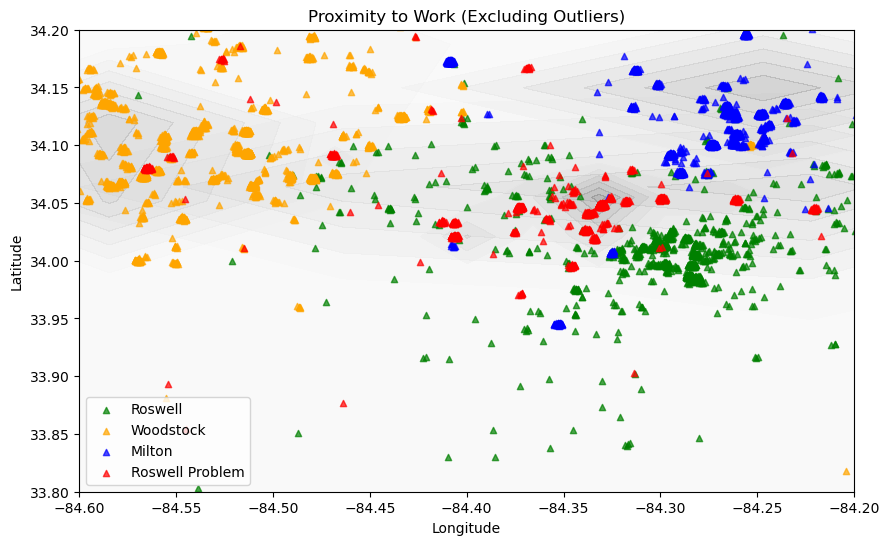

In [37]:


# List of cleaned gym files with corresponding colors
gym_files_colors = {
    "Roswell_cleaned.csv": "green",
    "Woodstock_cleaned.csv": "orange",
    "Milton_cleaned.csv": "blue",
    "Roswell Problem_cleaned.csv": "red"
}

# Define a figure without basemap elements
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size for a wider map

# List to store the polygons
polygons = []

for gym_file, color in gym_files_colors.items():
    # Read cleaned CSV file into pandas DataFrame
    df = pd.read_csv(gym_file)

    # Filter out missing values
    df.dropna(subset=['user_home_lat', 'user_home_long'], inplace=True)

    # Extract latitude and longitude columns
    latitudes = df['user_home_lat'].values
    longitudes = df['user_home_long'].values

    # Perform Kernel Density Estimation
    kde = KernelDensity(bandwidth=0.01, kernel='gaussian')
    kde.fit(np.vstack([latitudes, longitudes]).T)

    # Create a grid of points for density estimation (adjust resolution as needed)
    grid_points = np.linspace(min(latitudes), max(latitudes), 200), np.linspace(min(longitudes), max(longitudes), 200)
    grid_latitudes, grid_longitudes = np.meshgrid(*grid_points)
    grid_coordinates = np.vstack([grid_latitudes.ravel(), grid_longitudes.ravel()]).T
    density_values = np.exp(kde.score_samples(grid_coordinates))

    # Create a polygon from contour
    contour_polygon = plt.contourf(grid_longitudes, grid_latitudes, density_values.reshape(200, 200), cmap='Greys', alpha=0.2)
    
    # Get the contour paths
    for path in contour_polygon.collections:
        for contour_path in path.get_paths():
            polygons.append(Polygon(contour_path.vertices))

# Combine polygons into a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=polygons)

# Save GeoDataFrame to GeoJSON file
gdf.to_file("density_polygons.geojson", driver='GeoJSON')

# Plot the KDE density estimation as scatter plot
for gym_file, color in gym_files_colors.items():
    df = pd.read_csv(gym_file)
    plt.scatter(df['user_home_long'], df['user_home_lat'], s=20, marker='^', c=color, alpha=0.7, label=gym_file.replace("_cleaned.csv", ""))

# Set limits based on the desired zoomed-in area
plt.xlim([-84.6, -84.2])  # Adjust as needed
plt.ylim([33.8, 34.2])    # Adjust as needed

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Proximity to Work (Excluding Outliers)')
plt.legend()

plt.show()


In [38]:
# Load an empty map
from keplergl import KeplerGl

# Initialize Kepler.gl map instance
gym_map = KeplerGl()

# Add gyms scatter plot data
for gym_file, color in gym_files_colors.items():
    df = pd.read_csv(gym_file)
    gym_map.add_data(data=df, name=gym_file.replace("_cleaned.csv", ""))
    
# Add density polygons data
# gym_map.add_data(data=gdf, name='Density Polygons')

# Save the map configuration
config = gym_map.config

# Display the map
gym_map


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Roswell': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

In [39]:
config = gym_map.config
gym_map.save_to_html(config=config)

Map saved to keplergl_map.html!


In [40]:
# Load an empty map
from keplergl import KeplerGl
gym_map = KeplerGl()

with open('data/venues_info.csv', 'r') as f:
    csvData = f.read()
gym_map.add_data(data=csvData, name='gyms')

with open('data/competiton_gyms.csv', 'r') as f:
    csvData = f.read()
gym_map.add_data(data=csvData, name='competitors')

gym_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'gyms': '#,venue_id,venue_address,venue_lat,venue_lng,notes\n1,1e5fcd8d57a10111defbe772,"10790 …

In [41]:
# Extract device IDs for Roswell gym and Roswell Problem gym
roswell_device_ids = set(roswell_df['device_id'])
roswell_problem_device_ids = set(roswell_problem_df['device_id'])

# Find the intersection of device IDs
common_device_ids = roswell_device_ids.intersection(roswell_problem_device_ids)

# Count the number of overlapping device IDs
num_common_device_ids = len(common_device_ids)

print(f"Number of overlapping device IDs between Roswell and Roswell Problem gyms: {num_common_device_ids}")

Number of overlapping device IDs between Roswell and Roswell Problem gyms: 60


In [42]:

# Calculate the total number of unique device IDs in each dataset
total_roswell_device_ids = len(set(roswell_df['device_id']))
total_roswell_problem_device_ids = len(set(roswell_problem_df['device_id']))

print(f"Total number of unique device IDs in Roswell gym: {total_roswell_device_ids}")
print(f"Total number of unique device IDs in Roswell Problem gym: {total_roswell_problem_device_ids}")


Total number of unique device IDs in Roswell gym: 2068
Total number of unique device IDs in Roswell Problem gym: 654


## Conclusion

Here's a summary of the key challenges:
* Negative reputation due to facilities and service, as highlighted by customer reviews.
* Shorter visit durations compared to competitors with better amenities.
* Convenience might attract locals initially, but it's not enough to compete for retention against superior experiences offered elsewhere.

Actionable Recommendations
Based on our data-driven analysis, here are some recommendations to transform the Roswell Alpharetta gym:
* Facility Upgrades: Modernize the gym and address concerns raised in customer feedback.
* Customer Service Training: Enhance staff training to ensure a welcoming and helpful environment.
* Targeted Marketing Campaigns: Highlight the gym's convenient location while showcasing the improvements made.
* Improved Onboarding Process: Implement a comprehensive onboarding process for new members to get them acquainted with the gym and its offerings.
* Loyalty Programs & Flexible Memberships: Introduce loyalty programs and flexible membership options to cater to different member needs and encourage continued membership.
* Referral Program Expansion: Expand referral programs with rewards for both the referring member and new joiners.
* Social Media Engagement: Utilize social media to encourage positive member engagement and highlight the gym's improvements.

Arguments for Keeping the Gym:
* Strong Local Customer Base: The gym enjoys a loyal customer base from within a 5-mile radius, indicating convenience is a major factor for them. Removing the gym could force them to switch to competitors like LA Fitness or Crunch Fitness.
* Retention vs. Acquisition: While acquiring new members might be challenging due to another Planet Fitness nearby, retaining existing loyal members can be more cost-effective than attracting entirely new ones from further away.
* Data on Cannibalization: Analyze data on member overlap between the two gyms. If a significant portion of members don't use both locations, cannibalization might be minimal.
Arguments for Removing the Gym:
* Market Saturation: Two Planet Fitness gyms within 11 minutes might indicate market saturation. Combining resources at one location could be more efficient.
* Operational Costs: Maintaining two locations close together doubles operational costs like rent, utilities, and staff. Consolidating could lead to cost savings.
* Analyzing Member Traffic: See if the closer gym is busier than the one you're considering removing. Traffic patterns might suggest which location serves a larger and more active member base.
Recommendation:
Instead of a definitive recommendation, here's a data-driven approach to decide:
1. Analyze Member Demographics: Compare the demographics of members at both gyms (age, income, workout preferences, etc.).
2. Track Member Usage: See how often members use each gym, and if there's significant overlap between the two locations.
3. Consider Member Feedback: Conduct surveys or hold focus groups to understand how members feel about each gym's location, amenities, and overall experience.
4. Run Cost-Benefit Analysis: Estimate the cost savings from closing one gym and the potential loss of revenue from member churn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read gym visitation data for each gym
milton_df = pd.read_csv("data/milton.csv")
woodstock_df = pd.read_csv("data/woodstock.csv")
roswell_problem_df = pd.read_csv("data/roswell_problem.csv")
roswell_df = pd.read_csv("data/roswell.csv")

# Combine the device_id data from all gyms
all_gyms_df = pd.concat([milton_df[['device_id']], woodstock_df[['device_id']], roswell_problem_df[['device_id']], roswell_df[['device_id']]])

# Count the number of visits per device across all gyms
device_visit_counts = all_gyms_df['device_id'].value_counts()

# Calculate the churn rate for each gym
churn_rates = {}
for gym_name, gym_df in [("Milton", milton_df), ("Woodstock", woodstock_df), ("Roswell Problem", roswell_problem_df), ("Roswell", roswell_df)]:
    # Count the number of unique devices that visited the current gym
    unique_devices_gym = set(gym_df['device_id'])
    
    # Calculate the number of devices that visited this gym only once
    churn_count = sum(1 for device_id in unique_devices_gym if device_visit_counts[device_id] == 1)
    
    # Calculate churn rate as a percentage
    churn_rate = (churn_count / len(unique_devices_gym)) * 100
    churn_rates[gym_name] = churn_rate

# Plot churn rates for each gym in a histogram
plt.figure(figsize=(10, 6))
plt.bar(churn_rates.keys(), churn_rates.values(), color='skyblue')
plt.xlabel('Gym')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate for Each Gym')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


FileNotFoundError: [Errno 2] No such file or directory: 'data/milton.csv'